# 사용할 라이브러리 설정 및 시각화를 위한 설정

In [1]:
# 필요 라이브러리
import numpy as np
import pandas as pd

from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

# KBO타자 OPS 예측 경진 대회

## 탐색적 분석

### 데이터 가져오기

In [3]:
# 프리시즌 데이터 로드
preseason_df = pd.read_csv("./data/Pre_Season_Batter.csv")
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv("./data/Regular_Season_Batter.csv")

# 데이터 확인
preseason_df.info()
regular_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

### 프리시즌 데이터 확인

#### 기초 통계량 확인

In [4]:
# 데이터 기초 통계량 확인
print(preseason_df.describe())

         batter_id         year            G           AB            R  \
count  1393.000000  1393.000000  1393.000000  1393.000000  1393.000000   
mean    173.434314  2013.014358     8.705671    19.201723     2.679828   
std      94.716851     4.166757     5.562686    13.395946     2.637212   
min       0.000000  2002.000000     1.000000     0.000000     0.000000   
25%      99.000000  2010.000000     6.000000     9.000000     1.000000   
50%     178.000000  2014.000000     9.000000    18.000000     2.000000   
75%     254.000000  2017.000000    11.000000    28.000000     4.000000   
max     344.000000  2018.000000   119.000000   183.000000    35.000000   

                 H           2B           3B           HR           TB  ...  \
count  1393.000000  1393.000000  1393.000000  1393.000000  1393.000000  ...   
mean      5.021536     0.954774     0.119885     0.391960     7.391960  ...   
std       4.232584     1.196904     0.379976     0.748557     6.538787  ...   
min       0.00000

#### 데이터 시각화

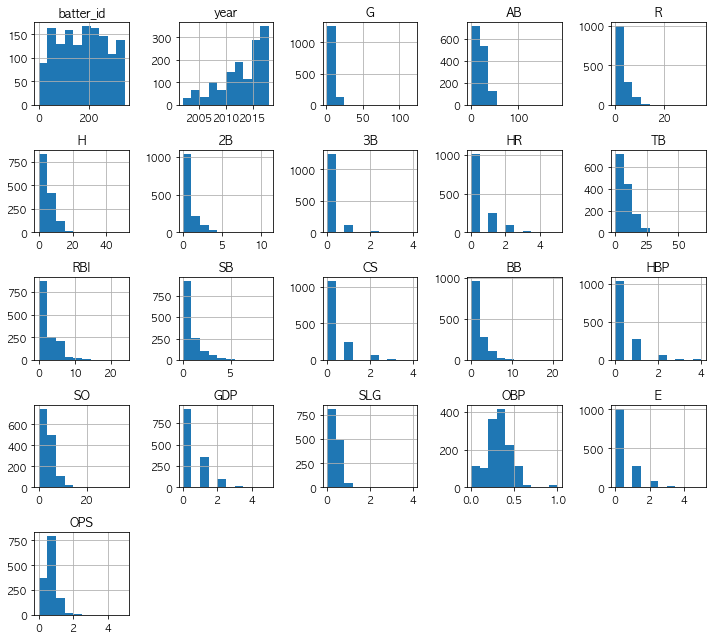

In [5]:
# 데이터 시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

#### 정규 시즌 선수 수 와 프리 시즌 선수 수 비교

In [6]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename(
        'ratio')], axis = 1).transpose().loc[:,2002:] # 2002년부터 봅니다.

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


#### 프리 시즌 과 정규 시즌의 상관 관계

In [7]:
# 타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + \
                               regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']). \
                        intersection(preseason_df['new_idx']))

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop=True) 

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(
    lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop=True)

# 구조 확인
print(regular_season_new.shape, preseason_new.shape)
print(sum(regular_season_new['new_idx'] == preseason_new['new_idx']))

(1358, 30) (1358, 30)


1358

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


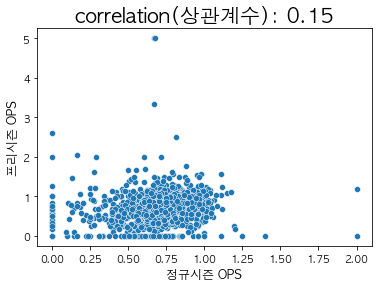

In [8]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("정규시즌 OPS",fontsize=12)
plt.ylabel("프리시즌 OPS",fontsize=12)
plt.show()

### 정규 시즌 데이터 분석

#### 기초 통계량 확인

In [9]:
print(regular_season_df.describe())

         batter_id         year          avg            G           AB  \
count  2454.000000  2454.000000  2428.000000  2454.000000  2454.000000   
mean    178.079462  2011.614507     0.237559    72.535045   201.514670   
std      97.557947     4.992833     0.098440    45.093871   169.537029   
min       0.000000  1993.000000     0.000000     1.000000     0.000000   
25%     101.250000  2008.000000     0.203000    28.000000    38.250000   
50%     183.000000  2013.000000     0.255000    79.000000   163.000000   
75%     265.000000  2016.000000     0.291000   115.000000   357.500000   
max     344.000000  2018.000000     1.000000   144.000000   600.000000   

                 R            H           2B           3B           HR  ...  \
count  2454.000000  2454.000000  2454.000000  2454.000000  2454.000000  ...   
mean     29.912388    55.988183     9.863488     0.957620     5.504075  ...   
std      28.778759    52.253844     9.871314     1.647193     7.989380  ...   
min       0.00000

#### 히스토그램 확인

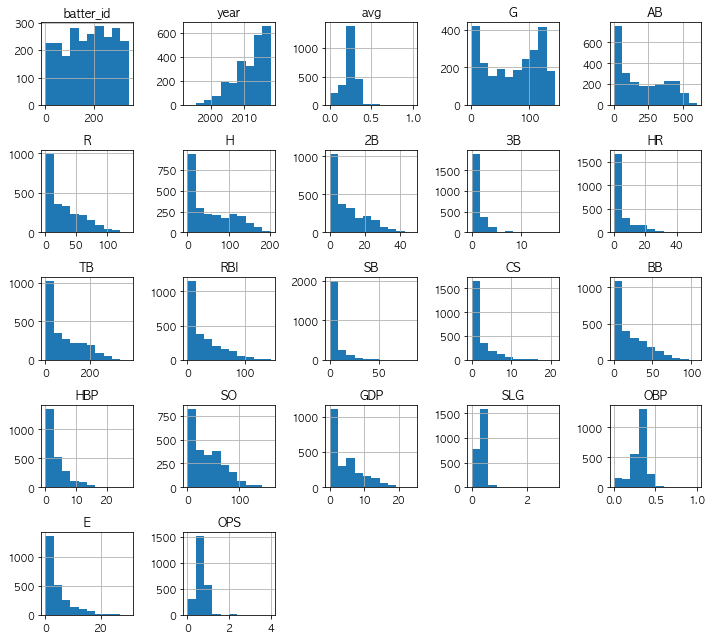

In [10]:
regular_season_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

#### OPS 상자 그림

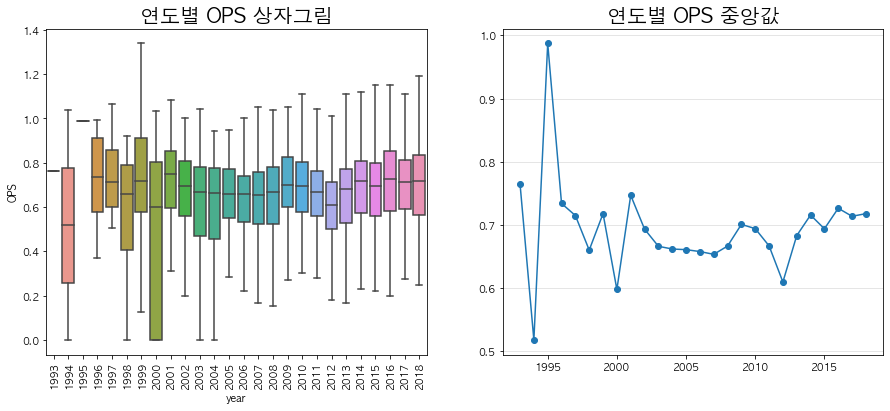

In [11]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="year", y="OPS", data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

#### 년도별 OPS 개수

In [12]:
pd.crosstab(regular_season_df['year'],'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


#### 년도별 팀별 OPS

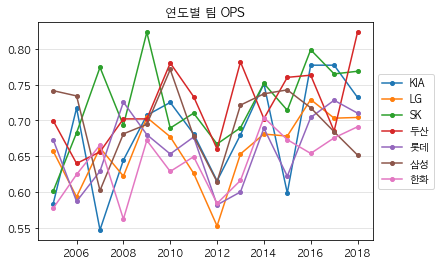

In [13]:
#연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index=['team'], columns='year',
                                             values='OPS', aggfunc='median')
# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1) <= 0

plt.plot(med_OPS_team.loc[team_idx,2005:].T, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('연도별 팀 OPS')
plt.show()

#### 키 와 몸무게 추출

In [14]:
import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+',x.split('/')[1])[0]) if pd.notnull(x) else x)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+',x.split('/')[0])[0]) if pd.notnull(x) else x)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0],
      regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


#### 힘 과 장타율의 상관 관계 와 스피드 와 출루율 과의 상관 관계

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


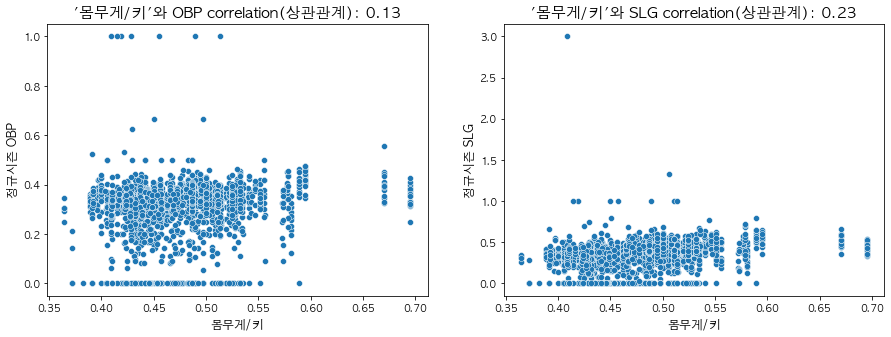

In [15]:
# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight'] / \
                                         regular_season_df['height']
plt.figure(figsize=(15, 5)) # 그래프 크기 조정
plt.subplot(1, 2, 1) # 1행 2열의 첫번째(1행, 1열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title("'몸무게/키'와 OBP correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 OBP',fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.subplot(1, 2, 2)

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title("'몸무게/키'와 SLG correlation(상관관계): " + str(np.round(correlation, 2)), \
          fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

#### 포지션 별 데이터 개수

In [16]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

#### 포지션 분리

In [17]:
# position
regular_season_df['pos']=regular_season_df['position'].apply(
    lambda x: x.split('(')[0] if pd.notnull(x) else x)

# 우타, 좌타, 양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x: x[-3:-1] if pd.notnull(x) else x)
print(regular_season_df['position'][0], regular_season_df['pos'][0], 
      regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


#### 포지션 별 타석 방향 별 OPS

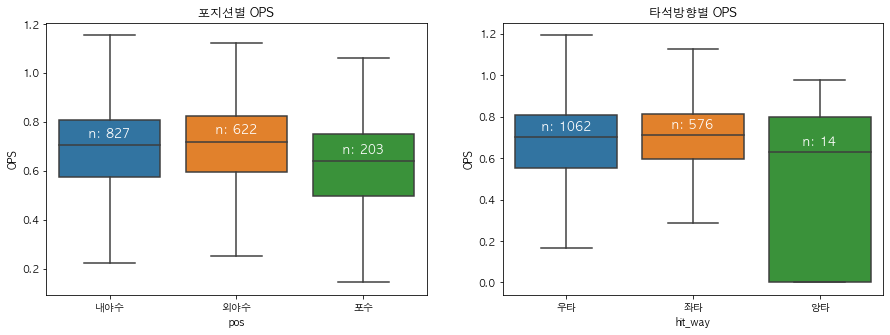

In [18]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='pos', y='OPS', data = regular_season_df, showfliers=False)

# position 별 OPS 중앙값
medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), 
            medians[label.get_text()] + 0.03, nobs[label.get_text()],
            horizontalalignment='center', size='large', color='w', weight='semibold')
    
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_season_df, showfliers=False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()

#### 커리어 관련 변수를 이용해서 외국인 과 내국인을 구별을 위해서 커리어 확인

In [19]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

#### career 정보를 세분화해서 재구성

In [20]:
# career를 split
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-', ' ').split(' ')[0])

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['도미니카', '캐나다', '네덜란드', '쿠바', '미국']

#### 외국인 과 내국인 구별

In [21]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x)
                 else ('foreign' if x in foreign_country_list else 'korean'))
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


#### 외국인 과 내국인 성적 비교

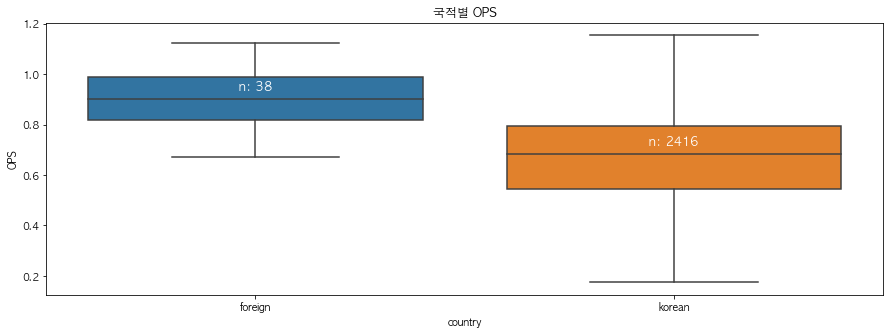

In [22]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
ax = sns.boxplot(x='country', y='OPS', data = regular_season_df, showfliers=False)

# 내외국인 별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()
# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환 
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    
for label in ax.get_xticklabels(): # tick은 tick의 위치, label은 그에 해당하는 text 값 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, \
            nobs[label.get_text()], # x 좌표, y 좌표, 해당 text
            horizontalalignment='center', size='large', color='w', weight='semibold') 
ax.set_title('국적별 OPS')
plt.show()

#### 연봉 확인

In [23]:
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

#### 연봉 과 OPS 관계 확인

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


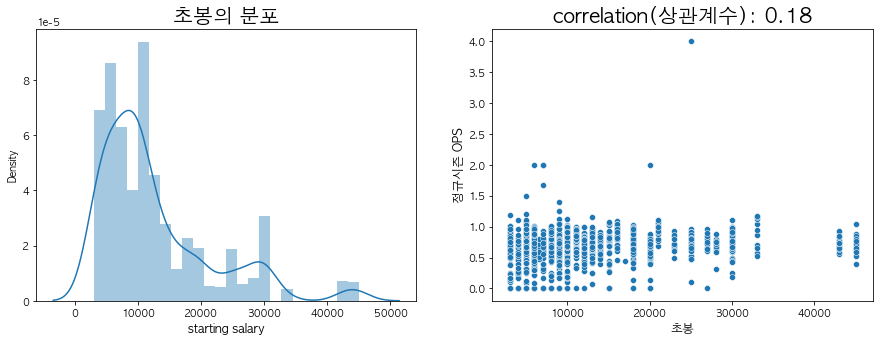

In [24]:
# 결측치라면 그대로 0으로 두고 ‘만원’이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다. 그외 만 원 단위가 아닌 초봉은 결측치로 처리한다.
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x)
                 else(int(re.findall('\d+',x)[0]) if '만원' in x else np.nan))

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
b=sns.distplot(regular_season_df['starting_salary']. \
               loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel("starting salary",fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
b.set_ylabel("정규시즌 OPS",fontsize=12)
b.set_xlabel("초봉",fontsize=12)
plt.show()

### 일별 데이터 분석

#### 일별 데이터 가져오기

In [25]:
day_by_day_df = pd.read_csv('./data/Regular_Season_Batter_Day_by_Day_b4.csv')
print(day_by_day_df.shape)
print(day_by_day_df.head())

(112273, 20)
   batter_id batter_name  date opposing_team   avg1  AB  R  H  2B  3B  HR  \
0          0        가르시아  3.24            NC  0.333   3  1  1   0   0   0   
1          0        가르시아  3.25            NC  0.000   4  0  0   0   0   0   
2          0        가르시아  3.27            넥센  0.200   5  0  1   0   0   0   
3          0        가르시아  3.28            넥센  0.200   5  1  1   0   0   0   
4          0        가르시아  3.29            넥센  0.250   4  0  1   0   0   0   

   RBI  SB  CS  BB  HBP  SO  GDP   avg2  year  
0    0   0   0   1    0   1    0  0.333  2018  
1    0   0   0   0    0   1    0  0.143  2018  
2    0   0   0   0    0   0    0  0.167  2018  
3    1   0   0   0    0   0    0  0.176  2018  
4    3   0   0   0    0   0    1  0.190  2018  


#### 월 과 일 생성

In [26]:
# 날짜(date)를 ‘.’을 기준으로 나누고 첫 번째 값을 월(month)로 지정 
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x: str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()

# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index=['month'], columns='year', values = 'avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


#### 3월 과 10월을 제외한 데이터 시각화

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


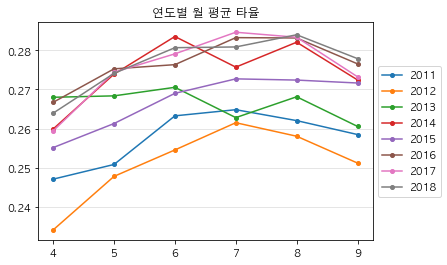

In [27]:
display(agg_df.iloc[2:, 10:])
plt.plot(agg_df.iloc[2:,10:], marker = 'o', markersize=4) # 2011~2018년 데이터만 이용
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(agg_df.iloc[2:,10:].columns,
           loc='center left', bbox_to_anchor=(1, 0.5)) # 범례 그래프 밖에 위치
plt.title('연도별 월 평균 타율')
plt.show()

## 데이터 전처리

### 결측치 와 이상치 처리

#### 결측치 개수 확인

In [28]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,0,1076,26,0,802,802,802,802,802,0


#### 수치형 데이터의 결측치 확인

In [29]:
# 수치형 타입의 변수 저장
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # 모든 numeric(수치형) 타입
num_cols = regular_season_df.select_dtypes(include=numerics).columns

# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1) > 0,num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


#### 정규 시즌과 일별 데이터, 프리 시즌 데이터 모두 결측치를 0으로 대체

In [30]:
# 수치형 변수에 포함되는 데이터 타입 선정
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 정규 시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numerics).columns] = \
    regular_season_df[regular_season_df.select_dtypes(include=numerics).columns].fillna(0)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,가르시아2018,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000.0,0.000,강경학2011,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000.0,0.686,강경학2014,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000.0,0.673,강경학2015,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000.0,0.489,강경학2016,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2014,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2015,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2016,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000.0,0.761,황진수2017,82.0,181.0,0.453039,내야수,양타,korean


In [31]:
# 일별 데이터에서 결측치를 0으로 채우기
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] = \
    day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [32]:
# 프리 시즌 데이터에서 결측치를 0으로 채우기
preseason_df[preseason_df.select_dtypes(include=numerics).columns] = \
    preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018


#### 수치형이 아닌 데이터의 결측치 확인

In [33]:
# 수치형이 아닌 변수 추출
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

# 수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis=1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1) > 0,
                      not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,new_idx,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2005,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2006,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2007,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2008,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2011,NaN,NaN,korean


#### 결측치 제거

In [34]:
# 삭제할 데이터 추출
drop_idx = regular_season_df.loc[
    # 안타가 0개 이상이면서 장타율이 0인 경우
    ((regular_season_df['H'] > 0) & (regular_season_df['SLG']==0)) |
        
    # 안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서
    # 출루율이 0인 경우
    (((regular_season_df['H'] > 0) |
      (regular_season_df['BB'] > 0) |
      (regular_season_df['HBP'] > 0)) &
     (regular_season_df['OBP'] == 0))
].index         

# 데이터 삭제
regular_season_df = regular_season_df.drop(drop_idx).reset_index(drop=True)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,가르시아2018,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000.0,0.000,강경학2011,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000.0,0.686,강경학2014,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000.0,0.673,강경학2015,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000.0,0.489,강경학2016,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2014,82.0,181.0,0.453039,내야수,양타,korean
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2015,82.0,181.0,0.453039,내야수,양타,korean
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2016,82.0,181.0,0.453039,내야수,양타,korean
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000.0,0.761,황진수2017,82.0,181.0,0.453039,내야수,양타,korean


### 규정 타수 정의

#### 타수 와 OPS 시각화

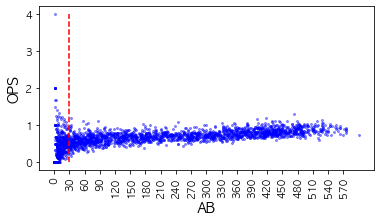

In [35]:
plt.figure(figsize=(6, 3)) # 크기 조정
plt.plot('AB', 'OPS', data=regular_season_df, linestyle='none', marker='o', 
         markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regular_season_df['AB']), max(regular_season_df['AB']), 30)),
           rotation=90)
plt.vlines(30,ymin=min(regular_season_df['OPS']),ymax=max(regular_season_df['OPS']),
           linestyles='dashed', colors='r')
plt.show()

#### 이상치 탐색

In [36]:
# OPS 이상치 탐색을 위한 수치 정의
Q1 = regular_season_df['OPS'].quantile(0.25)
Q3 = regular_season_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

# 실제 OPS 이상치 탐색
regular_season_df.loc[(regular_season_df['OPS'] < (Q1 - 1.5 * IQR)) |
                      (regular_season_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(
    by=['AB'], axis=0, ascending=False)[['batter_name','AB','year','OPS']].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000
1902,정병곤,15,2018,0.130000
1874,정경운,15,2018,0.130000
2384,현재윤,15,2014,1.229167


#### 7월 한달 동안 경기를 뛴 선수들의 수의 합

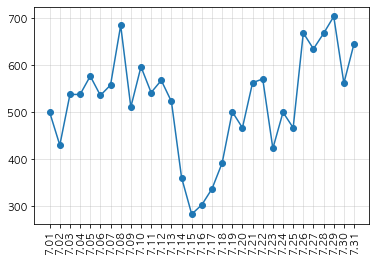

In [37]:
# 7.01~7.31 숫자 생성 후 반 올림
major_ticks = list(np.round(np.linspace(7.01,7.31, 31),2)) 

july = (day_by_day_df['date'] >= 7) & (day_by_day_df['date'] < 8) # 7월만 불러오는 index
plt.plot(major_ticks,
         day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')
plt.grid(linestyle='-', alpha=0.4)
plt.xticks(major_ticks,rotation=90)
plt.show()

### 시간 변수

#### 함수 정의

In [38]:
# 시간 변수를 생성하는 함수 정의
def lag_function(df, var_name, past):
    # df = 시간변수를 생성할 데이터 프레임
    # var_name = 시간변수 생성의 대상이 되는 변수 이름
    # past = 몇 년 전의 성적을 생성할지 결정 (정수형)
    df.reset_index(drop=True, inplace = True)
    
    #시간변수 생성
    df['lag'+str(past)+'_'+var_name] = np.nan;
    df['lag'+str(past)+'_'+'AB'] = np.nan
    
    for col in ['AB', var_name]:
        for i in range(0,(max(df.index)+1)):
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) & 
                         (df['year'] == df['year'][i] - past), col]
            # 과거 기록이 결측치가 아니라면 값을 넣기
            if(len(val) != 0):
                df.loc[i, 'lag' + str(past) + '_' + col] = val.iloc[0]

    #30타수 미만 결측치 처리
    df.loc[df['lag' + str(past) + '_' + 'AB'] < 30, 
           'lag' + str(past) + '_' + var_name] = np.nan
    df.drop('lag' + str(past) + '_' + 'AB', axis = 1, inplace = True)

    return df

#### 시간 범위 및 변수 선택

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/4076521938.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

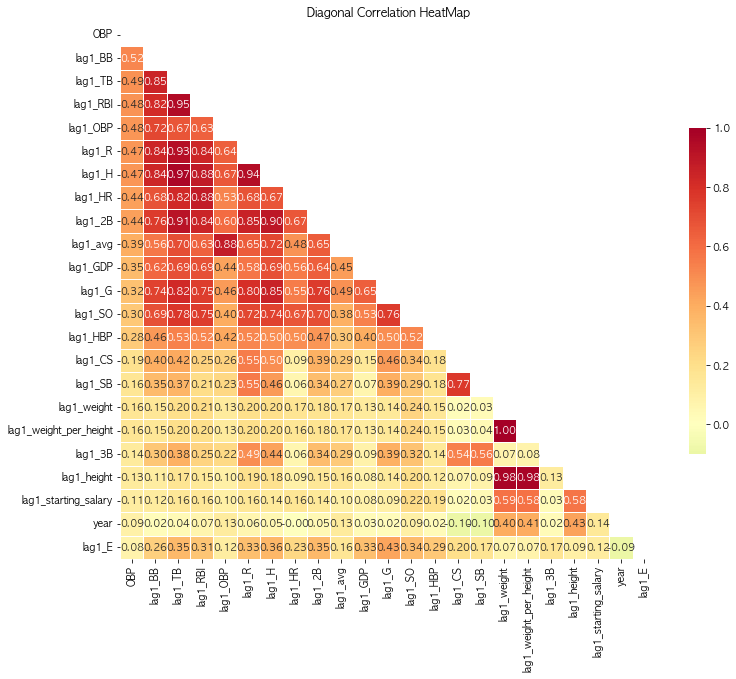

In [39]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','SLG'], axis =1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]

# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('OBP')
regular_season_temp.drop(numeric_cols, axis = 1, inplace= True)

# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'OBP', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

#### 희생타 생성

In [40]:
#희생 플라이 구하기
#OBP(출루율) 계산 공식 이용하여 SF(희생타)계산 >> (H+BB+HBP)/OBP-(AB+BB+HBP)
regular_season_df['SF'] = \
    regular_season_df[['H','BB','HBP']].sum(axis=1) / regular_season_df['OBP'] - \
    regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0, inplace = True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))

#한 타수당 평균 희생 플라이 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]
regular_season_df_SF

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901
...,...,...,...
2442,황진수,2014,0.000000
2443,황진수,2015,0.000000
2444,황진수,2016,0.000000
2445,황진수,2017,0.008547


#### OBP 도출

In [41]:
#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','BB','HBP'].sum().reset_index()

#day_by_day와 regular season에서 구한 희생 플라이 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left',
                                    on=['batter_name','year'])

#선수별 전반기 희생 플라이 수 계산
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(
    lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis = 1, inplace = True)

#선수별 전반기 OBP(출루율) 계산
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / \
                       sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
# OBP 결측치를 0으로 처리 
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

# 분석에 필요하지 않은 열 제거
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP']]
sum_hf_yr_OBP

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/1974055277.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(


,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


### 추가 변수 생성

#### 나이별 OBP 변화 추이 시각화

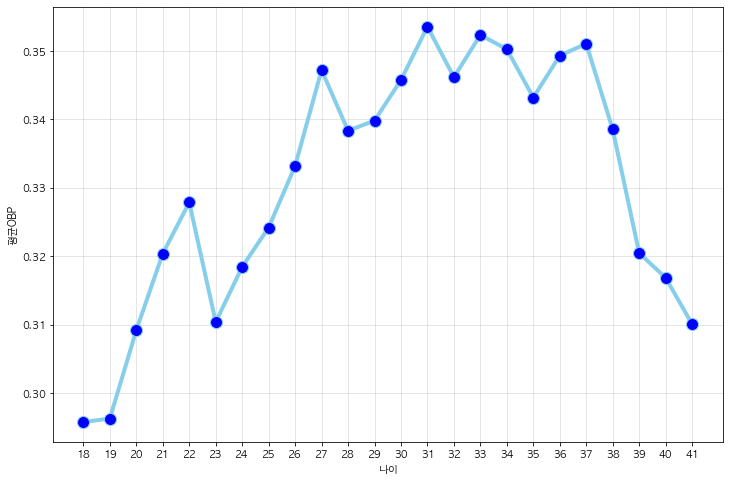

In [42]:
# 나이 변수 생성
regular_season_df['age'] = regular_season_df['year'] - \
                           regular_season_df['year_born'].apply(lambda x: int(x[:4]))

# 나이, 평균 출루율, 출루율 중위값으로 구성된 데이터프레임 구축
temp_df = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('age').agg(
    {'OBP':['mean','median']}).reset_index()
temp_df.columns = temp_df.columns.droplevel()
temp_df.columns = ['age', 'mean_OBP', 'median_OBP']

# 나이에 따른 출루율 추이 시각화
plt.figure(figsize=(12,8))
plt.plot('age', 'mean_OBP', data=temp_df, marker='o', markerfacecolor='blue',
         markersize=12, color='skyblue', linewidth=4)
plt.xticks(temp_df['age']) # 나이 표시
plt.grid(linestyle='-', alpha=0.4)
plt.ylabel('평균OBP')
plt.xlabel('나이')
plt.show()

#### 변수 추가

In [43]:
# 나이를 포함한 변수 선택
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 3)
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN
...,...,...,...,...,...,...,...,...
1381,황진수,2012,4,0.400000,23,NaN,NaN,NaN
1382,황진수,2013,0,0.000000,24,NaN,NaN,NaN
1383,황진수,2016,9,0.000000,27,NaN,NaN,NaN
1384,황진수,2017,71,0.316456,28,NaN,NaN,NaN


### 데이터 사후 처리

#### 결측치 확인

In [44]:
round(sum_hf_yr_OBP[['lag1_OBP','lag2_OBP','lag3_OBP']].isna().sum() / \
      sum_hf_yr_OBP.shape[0], 2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

#### 결측치 대체

In [45]:
#1. 선수별 OBP 평균
# SF = (H+BB+HBP) / OBP-(AB+BB+HBP)
# OBP = (H+BB+HBP) / (AB+BB+HBP+SF)
player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'batter_name')['AB','H','BB','HBP','SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / \
                            player_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)

#2. 시즌별 OBP 평균
season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'year')['AB','H','BB','HBP','SF'].sum().reset_index()
season_OBP_mean['mean_OBP'] = season_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1) / \
                              season_OBP_mean[['AB','BB','HBP','SF']].sum(axis=1)
season_OBP_mean = season_OBP_mean[['year', 'mean_OBP']]

#### player_OBP_mean(선수평균) 열 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']],
                                    how ='left', on="batter_name")
sum_hf_yr_OBP = \
    sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)
sum_hf_yr_OBP

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/2028086646.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/2028086646.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_OBP_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(


,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,NaN,NaN,NaN,0.358779
1348,황진수,2013,0,0.000000,24,NaN,NaN,NaN,0.358779
1349,황진수,2016,9,0.000000,27,NaN,NaN,NaN,0.358779
1350,황진수,2017,71,0.316456,28,NaN,NaN,NaN,0.358779


#### 결측치 제거하는 함수

In [46]:
# 결측치 처리하는 함수 정의
def lag_na_fill(data_set, var_name, past, season_var_mean_data):
    # data_Set: 이용할 데이터셋
    # var_name: 시간 변수를 만들 변수 이름
    # past: 몇 년 전 변수를 만들지 결정
    # season_var_name_mean_data season별로 var_name의 평균을 구한 데이터
  
    for i in range(0,len(data_set)):
        if np.isnan(data_set["lag"+str(past)+"_"+var_name][i]):
            data_set.loc[i,["lag"+str(past)+"_"+var_name]] = (
                data_set["mean" + "_" + var_name][i] + season_var_mean_data.loc[
                    season_var_mean_data['year'] == (data_set['year'][i] - past),
                    "mean_" + var_name].iloc[0]
                ) / 2
    return data_set

#### 결측치 처리

In [47]:
# 생성한 함수를 이용해 결측치 처리 진행
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 1, season_OBP_mean) # 1년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 2, season_OBP_mean) # 2년 전 성적 대체
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, "OBP", 3, season_OBP_mean) # 3년 전 성적 대체
sum_hf_yr_OBP

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,19,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880
...,...,...,...,...,...,...,...,...,...
1347,황진수,2012,4,0.400000,23,0.353580,0.357883,0.359052,0.358779
1348,황진수,2013,0,0.000000,24,0.347960,0.353580,0.357883,0.358779
1349,황진수,2016,9,0.000000,27,0.360760,0.363874,0.357131,0.358779
1350,황진수,2017,71,0.316456,28,0.363552,0.360760,0.363874,0.358779


### SLG 데이터 전처리

#### 과거 성적 과의 상관 관계 파악

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/3970716708.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

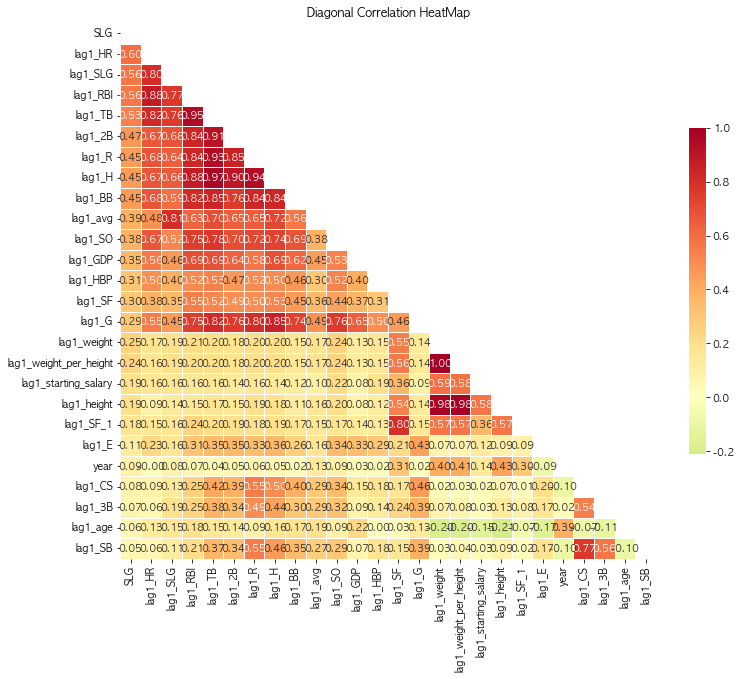

In [48]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regular_season_df.select_dtypes(include=numerics).drop(
    ['batter_id','year','OPS','OBP'], axis =1).columns)
regular_season_temp = regular_season_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB']>=30]

# 시간변수 생성 함수를 통한 지표별 1년 전 성적 추출
for col in numeric_cols:
    regular_season_temp = lag_function(regular_season_temp, col, 1)

numeric_cols.remove('SLG')
regular_season_temp.drop(numeric_cols, axis = 1, inplace=True)

# 상관관계 도출
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'SLG', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1, mask=mask, center=0, annot=True,
                fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

#### 장타율 과 결측치 처리 및 나이 계산

In [49]:
# day_by_day에서 연도별 선수의 시즌 전반기 장타율(SLG)과 관련된 성적 합 구하기
sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(
    ['batter_name','year'])['AB','H','2B','3B', 'HR'].sum().reset_index()

# 전반기 장타율 계산
sum_hf_yr_SLG['SLG'] = \
    (sum_hf_yr_SLG['H'] - sum_hf_yr_SLG[['2B', '3B', 'HR']].sum(axis=1) +
     sum_hf_yr_SLG['2B']*2 + sum_hf_yr_SLG['3B']*3 + sum_hf_yr_SLG['HR']*4
     ) / sum_hf_yr_SLG['AB']

# SLG 결측치를 0으로 처리 
sum_hf_yr_SLG['SLG'].fillna(0, inplace=True)

# 필요한 칼럼만 불러오고 나이 계산
sum_hf_yr_SLG = sum_hf_yr_SLG[['batter_name','year','AB','SLG']]
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(regular_season_df[['batter_name','year','age']],
                                    how='left', on=['batter_name','year'])
sum_hf_yr_SLG.head()

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/1799343003.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_hf_yr_SLG = day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(


,batter_name,year,AB,SLG,age
0,가르시아,2018,85,0.552941,33
1,강경학,2011,1,0.000000,19
2,강경학,2014,0,0.000000,22
3,강경학,2015,156,0.333333,23
4,강경학,2016,81,0.222222,24


#### 결측치 확인

In [50]:
# 총 3년 전 성적까지 변수를 생성
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 1)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 2)
sum_hf_yr_SLG = lag_function(sum_hf_yr_SLG, "SLG", 3)
display(sum_hf_yr_SLG.head())

round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/\
      sum_hf_yr_SLG.shape[0], 2)

,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG
0,가르시아,2018,85,0.552941,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,0.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.333333,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.333333,NaN,NaN


lag1_SLG    0.41
lag2_SLG    0.54
lag3_SLG    0.61
dtype: float64

#### 결측치 처리

In [51]:
# 선수별 SLG 평균 데이터(player_SLG_mean)를 만듭니다
player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'batter_name')['AB','H','2B','3B','HR'].sum().reset_index()
player_SLG_mean['mean_SLG'] = \
    (player_SLG_mean['H'] - player_SLG_mean[['2B','3B','HR']].sum(axis = 1) +
     player_SLG_mean['2B']*2 + player_SLG_mean['3B']*3 + player_SLG_mean['HR']*4
    ) / player_SLG_mean['AB']

# 시즌별 SLG 평균 데이터(season_SLG_mean)를 만듭니다
season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
    'year')['AB','H','2B','3B','HR'].sum().reset_index()
season_SLG_mean['mean_SLG'] = \
    (season_SLG_mean['H'] - season_SLG_mean[['2B','3B','HR']].sum(axis = 1) + 
     season_SLG_mean['2B']*2 + season_SLG_mean['3B']*3 + season_SLG_mean['HR']*4
    ) / season_SLG_mean['AB']

# 선수 평균의 SLG(player_OBP_mean)를 새로운 변수로 더합니다.
sum_hf_yr_SLG = sum_hf_yr_SLG.merge(player_SLG_mean[['batter_name', 'mean_SLG']],
                                    how='left', on="batter_name")

# 선수 평균의 성적이 결측치이면 데이터에서 제거합니다.
sum_hf_yr_SLG = \
    sum_hf_yr_SLG.loc[~sum_hf_yr_SLG['mean_SLG'].isna()].reset_index(drop=True)

# 결측치 처리
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 1, season_SLG_mean) #1년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 2, season_SLG_mean) #2년전 성적 대체
sum_hf_yr_SLG = lag_na_fill(sum_hf_yr_SLG, "SLG", 3, season_SLG_mean) #3년전 성적 대체

display(sum_hf_yr_SLG.head())
round(sum_hf_yr_SLG[['lag1_SLG', 'lag2_SLG', 'lag3_SLG']].isna().sum()/\
      sum_hf_yr_SLG.shape[0], 2)

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/987008319.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  player_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(
/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/987008319.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_SLG_mean = regular_season_df.loc[regular_season_df['AB'] >= 30].groupby(


,batter_name,year,AB,SLG,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
0,가르시아,2018,85,0.552941,33,0.481855,0.481498,0.476627,0.519126
1,강경학,2011,1,0.000000,19,0.372902,0.380882,0.361716,0.332527
2,강경학,2014,0,0.000000,22,0.362931,0.349344,0.359616,0.332527
3,강경학,2015,156,0.333333,23,0.389415,0.362931,0.349344,0.332527
4,강경학,2016,81,0.222222,24,0.333333,0.389415,0.362931,0.332527


lag1_SLG    0.0
lag2_SLG    0.0
lag3_SLG    0.0
dtype: float64

## 모델 구축 과 검증

### 데이터 분할

In [52]:
# 30타수 이상의 데이터만 학습
sum_hf_yr_OBP= sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB']>=30]
sum_hf_yr_SLG = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['AB']>=30] 

# 2018년 데이터를 test 데이터 2018년 이전은 train 데이터로 나눈다.
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

SLG_train = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] != 2018]
SLG_test = sum_hf_yr_SLG.loc[sum_hf_yr_SLG['year'] == 2018]
print(OBP_train.shape, OBP_test.shape, SLG_train.shape, SLG_test.shape)

(872, 9) (150, 9) (872, 9) (150, 9)


### 평가 지표를 위한 함수

In [53]:
def wrmse(v,w,p):
    # v: 실제값
    # w: 타수
    # p: 예측값
    return sum(np.sqrt(((v-p)**2 * w) / sum(w)))

### 모델 선택

#### 릿지 와 라쏘 모델

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
lasso_params = {'alpha':np.logspace(-4, 1, 6)} 
ridge_params = {'alpha':np.logspace(-4, 1, 6)} 

# GridSearchCV를 이용하여 dict에 Lasso, Ridege OBP 모델을 저장한다.
OBP_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
        OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_,}

# GridSearchCV를 이용하여 dict에 Lasso, Ridge SLG 모델을 저장한다
SLG_linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,
    'Ridge': GridSearchCV(Ridge(),param_grid=ridge_params).fit(
        SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_,}

#### 랜덤 포레스트

In [55]:
import time
from sklearn.ensemble import RandomForestRegressor 
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [50,100,150,200,300,500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5,6,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
OBP_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.iloc[:,-5:], OBP_train['OBP']).best_estimator_}

# GridSearchCV를 이용하여 dict에 OBP Randomforest 모델을 저장한다.
SLG_RF_models = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(SLG_train.iloc[:,-5:], SLG_train['SLG']).best_estimator_}

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 1186.883초


#### xgb 모델

In [56]:
import xgboost as xgb 
start = time.time() # 시작 시간 저장

# xgboost parmeter space를 정의한다.
XGB_params = {
    'min_child_weight': [1,3, 5,10],
    'gamma': [0.3,0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,7,10]}
# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_OBP_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
    param_grid=XGB_params, n_jobs=-1) 

XGB_SLG_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
    param_grid=XGB_params, n_jobs=-1)

# 모델 학습
XGB_OBP_gridsearch.fit(OBP_train.iloc[:,-5:], OBP_train['OBP'])
XGB_SLG_gridsearch.fit(SLG_train.iloc[:,-5:], SLG_train['SLG'])

print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 1986.821초


### 알고리즘 별 성능 평가

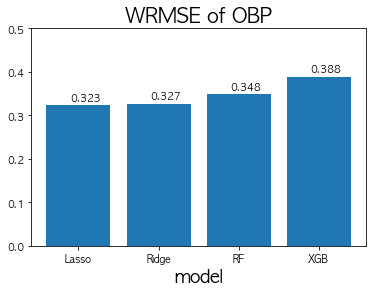

In [57]:
# 테스트 데이터셋(2018년)의 선수들의 OBP를 예측
Lasso_OBP = OBP_linear_models['Lasso'].predict(OBP_test.iloc[:,-5:])
Ridge_OBP = OBP_linear_models['Ridge'].predict(OBP_test.iloc[:,-5:])
RF_OBP = OBP_RF_models['RF'].predict(OBP_test.iloc[:,-5:])
XGB_OBP = XGB_OBP_gridsearch.predict(OBP_test.iloc[:,-5:])

# test 데이터의 WRMSE 계산
wrmse_score = [wrmse(OBP_test['OBP'], OBP_test['AB'], Lasso_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], Ridge_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], RF_OBP),
               wrmse(OBP_test['OBP'], OBP_test['AB'], XGB_OBP)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)

# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.
    
plt.show()

### 장타율 예측

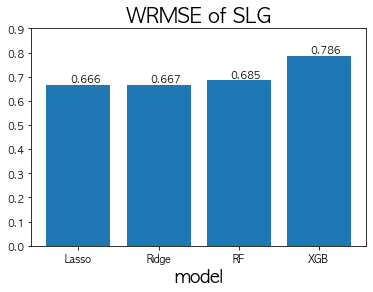

In [58]:
# 테스트 데이터셋(2018년)의 선수들의 SLG를 예측
Lasso_SLG = SLG_linear_models['Lasso'].predict(SLG_test.iloc[:,-5:])
Ridge_SLG = SLG_linear_models['Ridge'].predict(SLG_test.iloc[:,-5:])
RF_SLG = SLG_RF_models['RF'].predict(SLG_test.iloc[:,-5:])
XGB_SLG = XGB_SLG_gridsearch.predict(SLG_test.iloc[:,-5:])

# test데이터 WRMSE 계산
wrmse_score_SLG = [wrmse(SLG_test['SLG'], SLG_test['AB'], Lasso_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], Ridge_SLG), 
                   wrmse(SLG_test['SLG'], SLG_test['AB'], RF_SLG),
                   wrmse(SLG_test['SLG'], SLG_test['AB'], XGB_SLG)]

x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']

plt.bar(x_lab, wrmse_score_SLG)
plt.title('WRMSE of SLG', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0, 0.9)

# 막대그래프 위에 값을 표시
for i, v in enumerate(wrmse_score_SLG):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트를 표현한다.
plt.show()

### 결과 해석 및 평가

#### 랜덤 포레스트

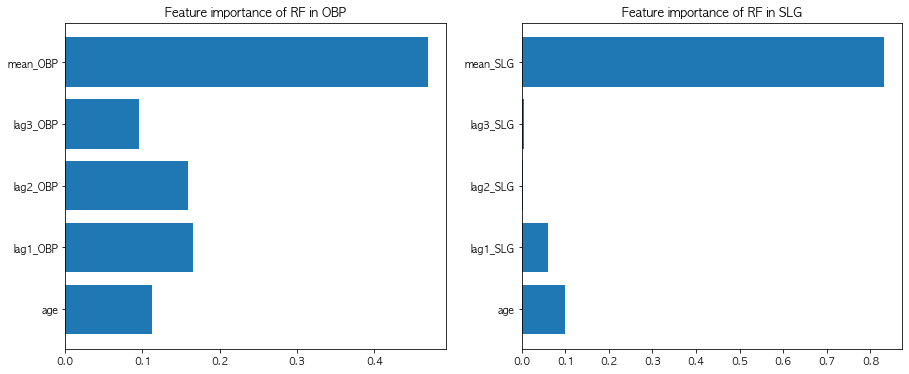

In [59]:
#변수의 중요도 확인
plt.figure(figsize=(15,6)) # 그래프의 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫번째(1,1) 그래프

#가로막대 그래프
plt.barh(OBP_train.iloc[:,-5:].columns,OBP_RF_models['RF'].feature_importances_) 

plt.title('Feature importance of RF in OBP')
plt.subplot(1,2,2) # 1행 2열의 두번째(1,2) 그래프
plt.barh(SLG_train.iloc[:,-5:].columns,SLG_RF_models['RF'].feature_importances_)
plt.title('Feature importance of RF in SLG')
plt.show()

#### 라쏘 와 릿지

In [60]:
# Lasso에서 GridSearchCV로 탐색한 최적의 alpha값 출력
print('Alpha : ', OBP_linear_models['Lasso'].alpha) 
# Lasso model의 선형 계수 값 출력
display(pd.DataFrame(OBP_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=OBP_train.iloc[:,-5:].columns, index = ['coefficient']))

print('Alpha : ', SLG_linear_models['Lasso'].alpha)
display(pd.DataFrame(SLG_linear_models['Lasso'].coef_.reshape(-1, 5),
                     columns=SLG_train.iloc[:,-5:].columns, index = ['coefficient']))

Alpha :  0.0001


,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
coefficient,0.003195,0.018249,0.0,0.0,0.864913


Alpha :  0.0001


,age,lag1_SLG,lag2_SLG,lag3_SLG,mean_SLG
coefficient,0.0049,0.081209,0.0,-0.0,0.836453


..

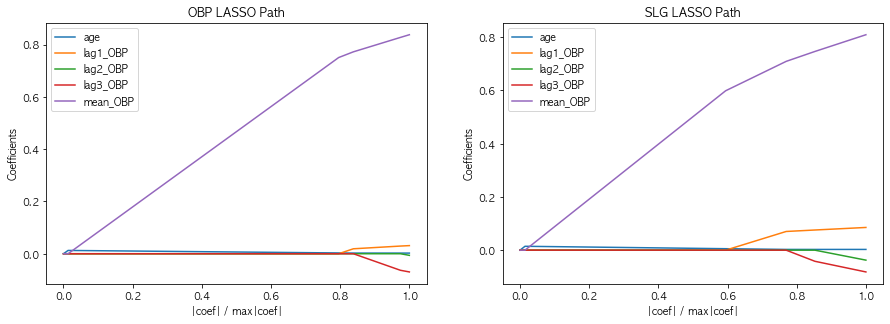

In [61]:
from sklearn.linear_model import lars_path
plt.figure(figsize=(15,4.8)) # 그래프 크기 지정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프 

# OBP 모델의 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(OBP_train.iloc[:,-5:].values, OBP_train['OBP'],
                             method='lasso', verbose=True)

# 피처별 alpha 값에 따른 선형 모델 계수의 절댓값의 합 
xx = np.sum(np.abs(coefs.T), axis=1)
# 계수의 절댓값 중 가장 큰 값으로 alpha에 따른 피처의 계수의 합을 나눈다. 
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('OBP LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프
# SLG 모델에서 alpha 값의 변화에 따른 계수의 변화를 alpha, coefs에 저장한다.
alphas, _, coefs = lars_path(SLG_train.iloc[:,-5:].values, SLG_train['SLG'],
                             method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('SLG LASSO Path')
plt.axis('tight')
plt.legend(OBP_train.iloc[:,-5:].columns)
plt.show()

## 성능 향상

### 앙상블

In [62]:
print('OBP model averaging: ',
      wrmse(OBP_test['OBP'], OBP_test['AB'], (Lasso_OBP + RF_OBP) / 2))
print('SLG model averaging: ',
      wrmse(SLG_test['SLG'], OBP_test['AB'], (Lasso_SLG + RF_SLG) / 2))

OBP model averaging:  0.3324574652010582
SLG model averaging:  0.668454113863326


### 단순화 된 모델

#### 데이터 전처리

In [63]:
# 전처리된 데이터를 다른 곳에 저장
sum_hf_yr_OBP_origin = sum_hf_yr_OBP.copy()

# 전체 희생타 계산
regular_season_df['SF'] = \
    regular_season_df[['H','BB','HBP']].sum(axis=1) / regular_season_df['OBP'] - \
    regular_season_df[['AB','BB','HBP']].sum(axis=1)
regular_season_df['SF'].fillna(0, inplace = True)
regular_season_df['SF'] = regular_season_df['SF'].apply(lambda x : round(x,0))

# 한 타수당 평균 희생타 계산 후 필요한 것만 추출
regular_season_df['SF_1'] = regular_season_df['SF'] / regular_season_df['AB']
regular_season_df_SF = regular_season_df[['batter_name','year','SF_1']]

#day_by_day에서 연도별 선수의 시즌 전반기 출루율과 관련된 성적 합 구하기 + BB, RBI 추가
sum_hf_yr_OBP = \
    day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name','year'])[
    'AB','H','BB','HBP','RBI', '2B', '3B', 'HR'].sum().reset_index()
#day_by_day와 regular season에서 구한 희생타 관련 데이터를 합치기
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df_SF, how = 'left',
                                    on=['batter_name','year'])

# 한 타수당 평균 희생타 계산
sum_hf_yr_OBP['SF'] = \
    (sum_hf_yr_OBP['SF_1']*sum_hf_yr_OBP['AB']).apply(lambda x: round(x,0))
sum_hf_yr_OBP.drop('SF_1',axis = 1, inplace = True)

# 전반기 OBP(출루율 계산)
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis = 1) / \
                       sum_hf_yr_OBP[['AB', 'BB', 'HBP','SF']].sum(axis = 1)
sum_hf_yr_OBP['OBP'].fillna(0, inplace = True)

# TB 계산
sum_hf_yr_OBP['TB'] =  sum_hf_yr_OBP['H'] + sum_hf_yr_OBP['2B']*2 + \
                       sum_hf_yr_OBP['3B']*3 + sum_hf_yr_OBP['HR']*4
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name','year','AB','OBP', 'BB', 'TB', 'RBI']]

# 나이 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_season_df[['batter_name','year','age']],
                                    how = 'left', on=['batter_name','year'])

# 평균 OBP 추가
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']],
                                    how ='left', on="batter_name")
sum_hf_yr_OBP = \
    sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/1176427461.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_by_day_df.loc[day_by_day_df['date'] <= 7.18].groupby(['batter_name','year'])[


#### 랜덤 포레스트 모델링

In [64]:
# 각 변수에 대한 1년 전 성적 생성
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "BB", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "TB", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "RBI", 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, "OBP", 1)

sum_hf_yr_OBP = sum_hf_yr_OBP.dropna() # 결측치 포함한 행 제거

# 변수 리스트 지정
feature_list_1 = ['age', 'lag1_OBP', 'mean_OBP']
feature_list_2 = ['age', 'lag1_BB', 'lag1_TB', 'lag1_RBI','lag1_OBP', 'mean_OBP']

In [65]:
# 학습시킬 데이터 30타수 이상만 학습
sum_hf_yr_OBP= sum_hf_yr_OBP.loc[sum_hf_yr_OBP['AB']>=30] 

# 2018년 test로 나누고 나머지는 학습
OBP_train = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] != 2018]
OBP_test = sum_hf_yr_OBP.loc[sum_hf_yr_OBP['year'] == 2018]

# grid search를 이용해 학습한다.
OBP_RF_models_1 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_1], OBP_train['OBP']).best_estimator_}

OBP_RF_models_2 = {
    'RF': GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(OBP_train.loc[:,feature_list_2], OBP_train['OBP']).best_estimator_}

#### 결과 확인

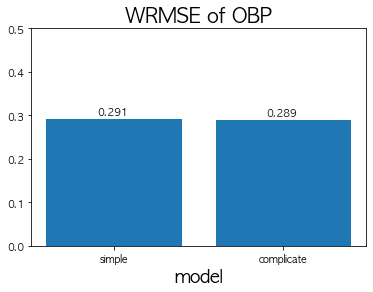

In [66]:
# 예측
RF_OBP_1 = OBP_RF_models_1['RF'].predict(OBP_test.loc[:,feature_list_1])
RF_OBP_2 = OBP_RF_models_2['RF'].predict(OBP_test.loc[:,feature_list_2])

# wrmse 계산
wrmse_score = [wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_1) ,
               wrmse(OBP_test['OBP'],OBP_test['AB'],RF_OBP_2)]
x_lab = ['simple', 'complicate']

plt.bar(x_lab, wrmse_score)
plt.title('WRMSE of OBP', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0,0.5)
# 막대그래프 위에 값을 표시해준다.
for i, v in enumerate(wrmse_score):
    plt.text(i-0.1, v + 0.01, str(np.round(v,3))) # x 좌표, y좌표, 텍스트 표시
plt.show()

#### 데이터 복원

In [67]:
# 최종 제출을 위한 원래 데이터 복구 
sum_hf_yr_OBP = sum_hf_yr_OBP_origin.copy()

### 테스트 데이터 정제

#### 데이터 생성

In [68]:
submission = pd.read_csv('./data/submission.csv')
submission['year'] = 2019 # 연도 기입

# 2019년의 Age(나이) 계산
batter_year_born = regular_season_df[['batter_id','batter_name','year_born']].copy()
# 중복선수 제거
batter_year_born = batter_year_born.drop_duplicates().reset_index(drop=True) 

submission = submission.merge(batter_year_born, how='left',
                              on=['batter_id', 'batter_name'])
submission['age'] = submission['year'] - \
                    submission['year_born'].apply(lambda x: int(x[:4]))
submission.head()

,batter_id,batter_name,year,year_born,age
0,1,강경학,2019,1992년 08월 11일,27
1,2,강구성,2019,1993년 06월 09일,26
2,3,강민국,2019,1992년 01월 10일,27
3,4,강민호,2019,1985년 08월 18일,34
4,5,강백호,2019,1999년 07월 29일,20


#### 데이터 합치기

In [70]:
# submission OBP, SLG 파일 2개 만들어 합치기 
submission_OBP = submission.copy()
submission_SLG = submission.copy()

# 앞서 전처리한 데이터를 이용해 평균 성적 기입
submission_OBP = submission_OBP.merge(
    sum_hf_yr_OBP[['batter_name','mean_OBP']].drop_duplicates().reset_index(drop=True),
    how = 'left', on ='batter_name')

# 앞서 전처리한 데이터를 이용해 과거 성적 값 채우기
for i in [1,2,3]:
    temp_lag_df = sum_hf_yr_OBP.loc[
        (sum_hf_yr_OBP['year'] == (2019 - i)) &
        (sum_hf_yr_OBP['AB']>=30),['batter_name','OBP']].copy()
    temp_lag_df.rename(columns={'OBP':'lag'+str(i)+'_OBP'}, inplace=True)
    submission_OBP = submission_OBP.merge(temp_lag_df, how='left', on='batter_name')

submission_OBP.head()

,batter_id,batter_name,year,year_born,age,mean_OBP,lag1_OBP,lag2_OBP,lag3_OBP
0,1,강경학,2019,1992년 08월 11일,27,0.337880,0.423611,0.285714,0.222222
1,2,강구성,2019,1993년 06월 09일,26,NaN,NaN,NaN,NaN
2,3,강민국,2019,1992년 01월 10일,27,NaN,NaN,NaN,NaN
3,4,강민호,2019,1985년 08월 18일,34,0.358187,0.328990,0.386076,0.441860
4,5,강백호,2019,1999년 07월 29일,20,0.356164,0.355685,NaN,NaN


#### 결측치 확인

In [71]:
submission_OBP['batter_name'].loc[submission_OBP['mean_OBP'].isna()].values

array(['강구성', '강민국', '강상원', '고명성', '김응민', '김종덕', '김주찬', '김철호', '김태연',
       '김태진', '김형준', '나원탁', '남태혁', '박광열', '박기혁', '백민기', '샌즈', '신범수',
       '신성현', '양종민', '윤정우', '이동훈', '이범호', '이병휘', '이성곤', '이인행', '이종욱',
       '이진영', '이창진', '장승현', '장시윤', '전민재', '전병우', '정경운', '정성훈', '조홍석',
       '최원제', '홍창기'], dtype=object)

#### 결측치 처리 - case1

In [72]:
for batter_name in ["김주찬", "이범호"]:
     # 30타수 이상인 해당선수의 인덱스(Boolean)
    cond_regular = (regular_season_df['AB'] >= 30) & \
                   (regular_season_df['batter_name'] == batter_name)
    
    # 타수를 고려해 평균 OBP 계산
    mean_OBP = sum(regular_season_df.loc[cond_regular,'AB'] * \
                   regular_season_df.loc[cond_regular,'OBP']) / \
               sum(regular_season_df.loc[cond_regular,'AB'])
    
    submission_OBP.loc[(submission_OBP['batter_name'] == batter_name),'mean_OBP'] = \
        mean_OBP
    
    # regular_season_Batter으로부터 1, 2, 3년 전 성적 구하기
    cond_sub = submission_OBP['batter_name'] == batter_name
    submission_OBP.loc[cond_sub,'lag1_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2018),'OBP'].values
    submission_OBP.loc[cond_sub,'lag2_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2017),'OBP'].values
    submission_OBP.loc[cond_sub,'lag3_OBP'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year']==2016),'OBP'].values

#### 결측치 처리 - case2

In [73]:
for i in np.where(submission_OBP['batter_name'].isin(["고명성","전민재","김철호","신범수","이병휘"])):
    #submission_OBP.loc[i,'mean_OBP'] = season_OBP_mean.loc[season_OBP_mean['year']==2018,'mean_OBP'].values
    submission_OBP.loc[i,'mean_OBP'] = \
        season_OBP_mean.loc[season_OBP_mean['year']==2018,'mean_OBP']

#### 결측치 처리 - case3

In [74]:
for batter_name in ["전병우","샌즈"]:
    # 30 타수 이상인 해당 선수의 index 추출
    cond_regular = (regular_season_df['AB']>=30) & \
                   (regular_season_df['batter_name']==batter_name) 

# 타수를 고려해 선수의 평균 OBP계산
mean_OBP = sum(regular_season_df.loc[cond_regular,'AB'] * \
               regular_season_df.loc[cond_regular,'OBP']) / \
           sum(regular_season_df.loc[cond_regular,'AB'])
    
submission_OBP.loc[(submission_OBP['batter_name'] == batter_name),'mean_OBP'] = mean_OBP

cond_sub = submission_OBP['batter_name'] == batter_name

# 2018년 데이터로부터 2019년의 1년 전 성적 기입
submission_OBP.loc[cond_sub,'lag1_OBP'] = regular_season_df.loc[
    (cond_regular)&(regular_season_df['year']==2018),'OBP'].values

#### 결측치 처리 - case4

In [75]:
# 평균 성적이 결측치인 선수들에 대해 평균 OBP의 하위 25% 성적 기입
submission_OBP.loc[submission_OBP['mean_OBP'].isna(),'mean_OBP'] = \
    np.quantile(player_OBP_mean['mean_OBP'],0.25)

#### 결측치 처리 - 1, 2, 3년 전 데이터

In [76]:
for i in [1,2,3]: 
    # i년 전 OBP 결측치 제거
    submission_OBP = lag_na_fill(submission_OBP, 'OBP', i, season_OBP_mean)
submission_OBP.head()

,batter_id,batter_name,year,year_born,age,mean_OBP,lag1_OBP,lag2_OBP,lag3_OBP
0,1,강경학,2019,1992년 08월 11일,27,0.337880,0.423611,0.285714,0.222222
1,2,강구성,2019,1993년 06월 09일,26,0.304124,0.329991,0.330297,0.336224
2,3,강민국,2019,1992년 01월 10일,27,0.304124,0.329991,0.330297,0.336224
3,4,강민호,2019,1985년 08월 18일,34,0.358187,0.328990,0.386076,0.441860
4,5,강백호,2019,1999년 07월 29일,20,0.356164,0.355685,0.356317,0.362245


#### 결측치 처리 - 장타율 평균 채우기

In [77]:
# 앞서 전처리한 데이터로 평균 SLG 값 기입
submission_SLG = submission_SLG.merge(
    sum_hf_yr_SLG[['batter_name','mean_SLG']].drop_duplicates().reset_index(drop=True),
    how='left', on='batter_name')

# 앞서 전처리한 데이터에서 과거 SLG 값 채우기
for i in [1,2,3]:
    temp_lag_df = sum_hf_yr_SLG.loc[(sum_hf_yr_SLG['year'] == (2019 - i)) &
        (sum_hf_yr_SLG['AB']>=30),['batter_name','SLG']].copy()
    
    temp_lag_df.rename(columns={'SLG':'lag'+str(i)+'_SLG'}, inplace=True)
    
    submission_SLG = submission_SLG.merge(temp_lag_df, how='left', on='batter_name')

#### 결측치 확인

In [78]:
submission_SLG['batter_name'].loc[submission_SLG['mean_SLG'].isna()].values

array(['강구성', '강민국', '강상원', '고명성', '김응민', '김종덕', '김주찬', '김철호', '김태연',
       '김태진', '김형준', '나원탁', '남태혁', '박광열', '박기혁', '백민기', '샌즈', '신범수',
       '신성현', '양종민', '윤정우', '이동훈', '이범호', '이병휘', '이성곤', '이인행', '이종욱',
       '이진영', '이창진', '장승현', '장시윤', '전민재', '전병우', '정경운', '정성훈', '조홍석',
       '최원제', '홍창기'], dtype=object)

#### 결측치 처리 - 케이스 별 처리

In [79]:
for batter_name in ["김주찬", "이범호"]:
     # mean_SLG 계산
    cond_regular = (regular_season_df['AB'] >= 30) & \
                   (regular_season_df['batter_name'] == batter_name)
    
    # 타수를 고려해 선수의 평균 SLG 계산
    mean_SLG = sum(regular_season_df.loc[cond_regular,'AB'] * \
                   regular_season_df.loc[cond_regular,'SLG']) / \
               sum(regular_season_df.loc[cond_regular,'AB'])
    
    submission_SLG.loc[(submission_SLG['batter_name'] == batter_name), 'mean_SLG'] = \
        mean_SLG
    
    # regular_season_Batter으로부터 1, 2, 3년 전 성적 구하기
    cond_sub = submission_SLG['batter_name'] == batter_name
    
    submission_SLG.loc[cond_sub,'lag1_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2018),'SLG'].values
    submission_SLG.loc[cond_sub,'lag2_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2017),'SLG'].values
    submission_SLG.loc[cond_sub,'lag3_SLG'] = regular_season_df.loc[
        (cond_regular) & (regular_season_df['year'] == 2016),'SLG'].values

In [80]:
for i in np.where(submission_SLG['batter_name'].isin(
    ["고명성","전민재","김철호","신범수","이병휘"])):
     # 위의 해당 선수들의 평균 SLG 평균값으로 대체
    #submission_SLG.loc[i,'mean_SLG'] = season_SLG_mean.loc[season_SLG_mean['year']==2018,'mean_SLG'].values
    submission_SLG.loc[i,'mean_SLG'] = \
        season_SLG_mean.loc[season_SLG_mean['year']==2018,'mean_SLG']

In [81]:
for batter_name in ["전병우","샌즈"]:
    
    # 30타수 이상인 해당선수의 인덱스(Boolean) 
    cond_regular = (regular_season_df['AB']>=30)&\
(regular_season_df['batter_name']==batter_name)

# 타수를 고려한 평균 SLG 계산
mean_SLG = sum(regular_season_df.loc[cond_regular,'AB']*
regular_season_df.loc[cond_regular,'SLG']) / sum(regular_season_df.loc[cond_regular,'AB'])

# 해당 선수의 평균 SLG 값 기입
submission_SLG.loc[(submission_SLG['batter_name'] == batter_name),
'mean_SLG'] = mean_SLG

# 해당 선수의 1년 전 SLG값 기입
cond_sub = submission_SLG['batter_name'] == batter_name
submission_SLG.loc[cond_sub,'lag1_SLG'] = regular_season_df.loc[(cond_regular)&
(regular_season_df['year']==2018),'SLG'].values

In [82]:
# 평균 성적이 결측치인 선수들에 대해 평균 SLG의 하위 25% 성적 기입
submission_SLG.loc[submission_SLG['mean_SLG'].isna(),'mean_SLG'] = \
    np.quantile(player_SLG_mean['mean_SLG'],0.25)

In [83]:
for i in [1,2,3]:
    # i년 전 SLG 성적 결측치 처리
    submission_SLG = lag_na_fill(submission_SLG, 'SLG', i, season_SLG_mean)
submission_SLG.head()

,batter_id,batter_name,year,year_born,age,mean_SLG,lag1_SLG,lag2_SLG,lag3_SLG
0,1,강경학,2019,1992년 08월 11일,27,0.332527,0.523810,0.256098,0.222222
1,2,강구성,2019,1993년 06월 09일,26,0.326923,0.391429,0.385754,0.385397
2,3,강민국,2019,1992년 01월 10일,27,0.326923,0.391429,0.385754,0.385397
3,4,강민호,2019,1985년 08월 18일,34,0.466540,0.487273,0.548736,0.577689
4,5,강백호,2019,1999년 07월 29일,20,0.523719,0.532051,0.484152,0.483795


### 모델을 이용한 예측

In [84]:
# Random Forests를 이용해 OBP 예측
predict_OBP = OBP_RF_models['RF'].predict(submission_OBP.iloc[:,-5:]) 
# Lasso를 이용해 SLG 예측
predict_SLG = SLG_linear_models ['Lasso'].predict(submission_SLG.iloc[:,-5:])

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


### 제출할 데이터 세트 생성

In [85]:
final_submission = submission[['batter_id','batter_name']]
final_submission['OPS'] = predict_SLG + predict_OBP # OBP + SLG = OPS 
final_submission.head(10)

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/1065474025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submission['OPS'] = predict_SLG + predict_OBP # OBP + SLG = OPS


,batter_id,batter_name,OPS
0,1,강경학,0.503957
1,2,강구성,0.687933
2,3,강민국,0.696609
3,4,강민호,0.958395
4,5,강백호,0.751592
5,8,강상원,0.661807
6,9,강승호,0.505642
7,11,강진성,0.656007
8,12,강한울,0.672859
9,16,고명성,0.640507


### 반발 계수의 변화

#### 홈런 수 확인

In [86]:
# 시즌별 전체 OBP 계산(30타수 이상인 선수들의 기록만 이용)
season_OBP = \
    regular_season_df.loc[regular_season_df['AB'] >= 30].groupby('year').agg(
        {'AB':'sum', 'H':'sum', 'BB':'sum', 'HBP':'sum', 'SF':'sum'}).reset_index()

season_OBP['OBP'] = season_OBP[['H','BB','HBP']].sum(axis=1) / \
                    season_OBP[['AB','BB','HBP','SF']].sum(axis=1)

# 시즌별 전체 SLG 계산(30타수 이상인 선수들의 기록만 이용)
season_SLG = \
    regular_season_df.loc[regular_season_df['AB']>=30].groupby('year').agg(
        {'AB':'sum', 'H':'sum', '2B':'sum', '3B':'sum', 'HR':'sum'}).reset_index()

season_SLG['SLG'] = ((season_SLG['H'] - season_SLG[['2B','3B','HR']].sum(axis=1)) + \
                     season_SLG['2B']*2+season_SLG['3B']*3+ season_SLG['HR']*4) / \
                    season_SLG['AB']

# season_OBP와 season_SLG를 병합 후 season_OPS를 생성해 OPS 계산
season_OPS = pd.merge(season_OBP[['year','OBP']],season_SLG[['year', 'SLG']], on = 'year')
season_OPS['OPS'] = season_OPS['OBP'] + season_OPS['SLG']

# 시즌별 전체 홈런 수와 한 선수당 평균 홈런 수 계산
season_HR = regular_season_df.loc[regular_season_df['AB']>=30].groupby('year').agg(
    {'HR':['sum','mean','count']}).reset_index()
season_HR.columns = ['year', 'sum_HR', 'mean_HR', 'count']

# 기존의 OPS 데이터셋과 병합
season_OPS = season_OPS.merge(season_HR,on ='year' ,how='left')
display(season_OPS.tail())

,year,OBP,SLG,OPS,sum_HR,mean_HR,count
21,2014,0.368970,0.446302,0.815272,1013,7.235714,140
22,2015,0.362742,0.434129,0.796871,1222,7.685535,159
23,2016,0.368325,0.443871,0.812196,1267,7.918750,160
24,2017,0.356469,0.444584,0.801053,1450,8.285714,175
25,2018,0.355858,0.455936,0.811794,1726,9.806818,176


#### 홈런 수 차이

In [87]:
#2018년의 평균 홈런 개수를 시즌별 평균 홈런 수에서 뺀다(HR_diff)
season_OPS['HR_diff'] = season_OPS['mean_HR'] - season_OPS['mean_HR'].iloc[-1]
difference = season_OPS.sort_values(by = 'HR_diff')[['year','OPS','HR_diff']]
display(difference.reset_index(drop=True).head(12))

,year,OPS,HR_diff
0,2012,0.703301,-5.799242
1,2013,0.748820,-4.891325
2,2006,0.709301,-4.806818
3,2008,0.741542,-4.671987
4,2011,0.735087,-4.564883
5,2007,0.730715,-4.451555
6,2005,0.740615,-3.543660
7,2010,0.770265,-2.623332
8,2014,0.815272,-2.571104
9,2004,0.751737,-2.500696


#### 2004년 부터 확인

In [88]:
# 2000년도 이전의 데이터 수가 충분치 않아 고려하지 않는다.
season_OPS.loc[season_OPS['year']>2000]

,year,OBP,SLG,OPS,sum_HR,mean_HR,count,HR_diff
8,2001,0.366585,0.454593,0.821178,199,7.653846,26,-2.152972
9,2002,0.343798,0.424739,0.768536,274,8.838710,31,-0.968109
10,2003,0.353936,0.427291,0.781227,301,7.717949,39,-2.088869
11,2004,0.344181,0.407556,0.751737,358,7.306122,49,-2.500696
12,2005,0.344851,0.395764,0.740615,357,6.263158,57,-3.543660
13,2006,0.334390,0.374912,0.709301,345,5.000000,69,-4.806818
14,2007,0.346222,0.384493,0.730715,407,5.355263,76,-4.451555
15,2008,0.350637,0.390905,0.741542,457,5.134831,89,-4.671987
16,2009,0.359326,0.429237,0.788563,806,8.141414,99,-1.665404
17,2010,0.356988,0.413278,0.770265,783,7.183486,109,-2.623332


#### 새로운 예측 생성

In [89]:
final_submission['OPS'] = final_submission['OPS'] - 0.038
display(final_submission.head(10))
final_submission.to_csv('submission.csv', index=False) # 최종 제출파일 생성

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_12456/2261783804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_submission['OPS'] = final_submission['OPS'] - 0.038


,batter_id,batter_name,OPS
0,1,강경학,0.465957
1,2,강구성,0.649933
2,3,강민국,0.658609
3,4,강민호,0.920395
4,5,강백호,0.713592
5,8,강상원,0.623807
6,9,강승호,0.467642
7,11,강진성,0.618007
8,12,강한울,0.634859
9,16,고명성,0.602507


# 자전거 수요 예측

## 데이터 가져오기

In [2]:
bike_df = pd.read_csv('./data/bike/train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
bike_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## datetime 의 열을 DataTime 타입으로 변환하고 년, 월, 일, 시로 분할

In [4]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


## 불필요한 컬럼 제거

In [5]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

## 로그 변환 과 평가지표를 위한 함수를 선언

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))


## 선형 회귀 수행

In [7]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_56513/1735228488.py:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [8]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


## 타겟 확인

<AxesSubplot:>

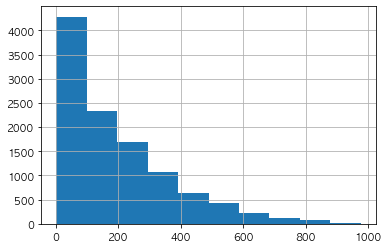

In [9]:
y_target.hist()

## 타겟의 로그 변환

<AxesSubplot:>

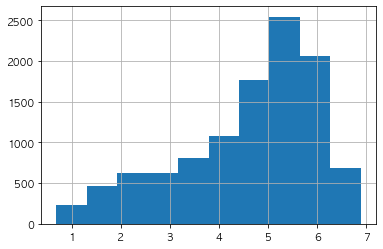

In [10]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

## 타겟의 로그 변환 후 다시 학습

In [11]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


## 피처 별 회귀 계수 확인

<AxesSubplot:>

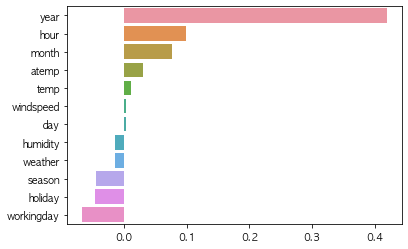

In [12]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 피처 변환환 후 선형 회귀와 규제를 적용한 후 학습한 후 평가

In [13]:
#year, month, day, hour 등의 피처를 One-Hot Encoding
X_features_ohe = pd.get_dummies(X_features , columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.687, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<AxesSubplot:>

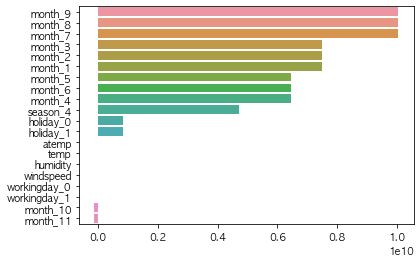

In [14]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

## 트리 모델 적용

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355, RMSE: 50.264, MAE: 31.193
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.321, MAE: 32.730
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029


# 캐글 주택 가격 예측

## 데이터 가져오기

In [16]:
house_df_org = pd.read_csv('./data/house/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## 데이터 확인

In [17]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


## 타겟 확인 – 정규 분포 인지 확인

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

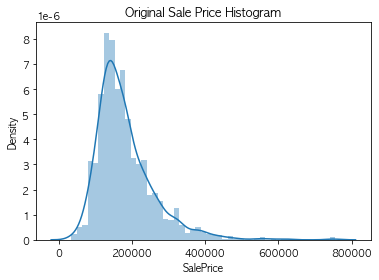

In [18]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

## 타겟 확인 – 타겟 로그 변환

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

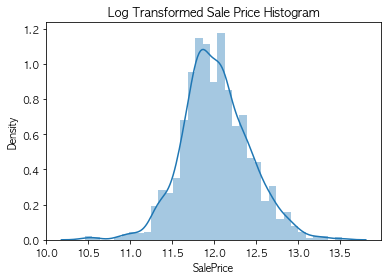

In [19]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [20]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_56513/2672594622.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house_df.fillna(house_df.mean(),inplace=True)


## 문자 피쳐 원 핫 인코딩

In [21]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


## 선형 회귀 적용

In [22]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154202, 0.1275084633405304, 0.17628250556471395]

## 회귀 계수 확인

In [24]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


In [25]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 행을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(12,22),nrows=3, ncols=1)
    #fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(10)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])


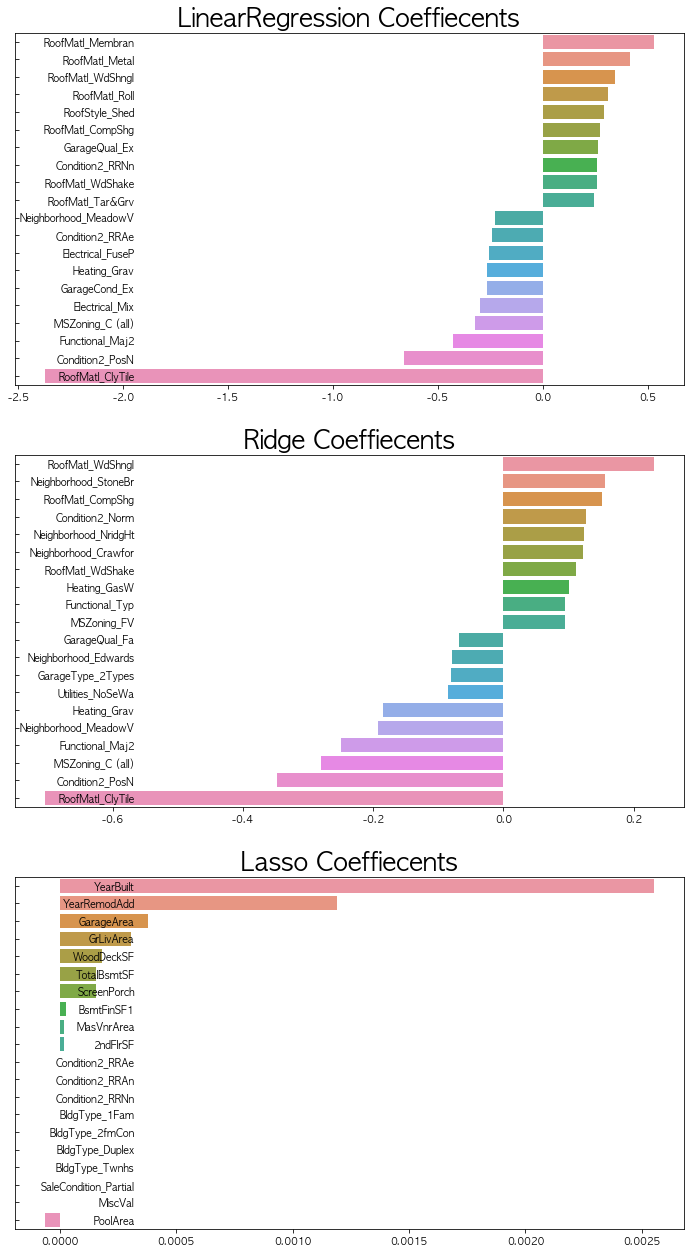

In [26]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


## 교차 검증

In [27]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


## 하이퍼 파라미터 튜닝

In [28]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


## 튜닝의 결과를 가지고 훈련

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


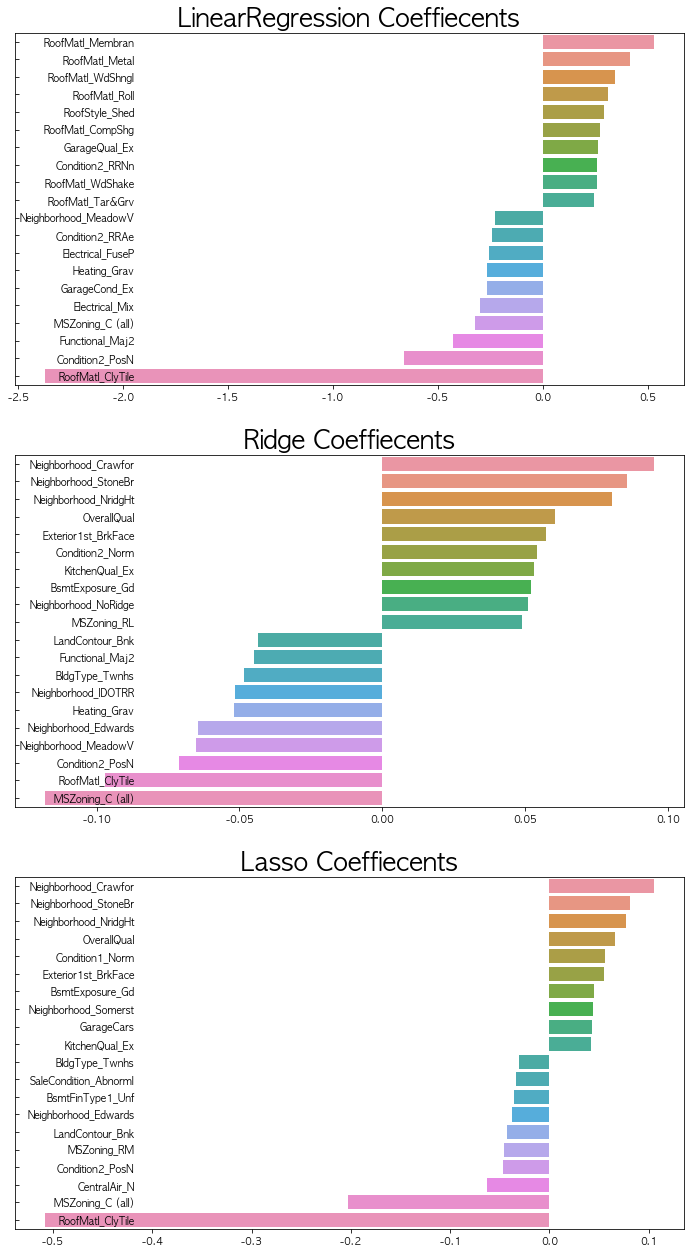

In [29]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## 데이터 분포 확인

In [30]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


## 로그 변환 

In [31]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

## 로그 변환 후 데이터를 다시 원 핫 인코딩해서 모델에 적용

In [32]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha:{'alpha': 0.001}


## 로그 변환 후 데이터를 다시 원 핫 인코딩해서 모델에 적용한 후 회귀 계수 시각화

LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 RMSE: 0.119


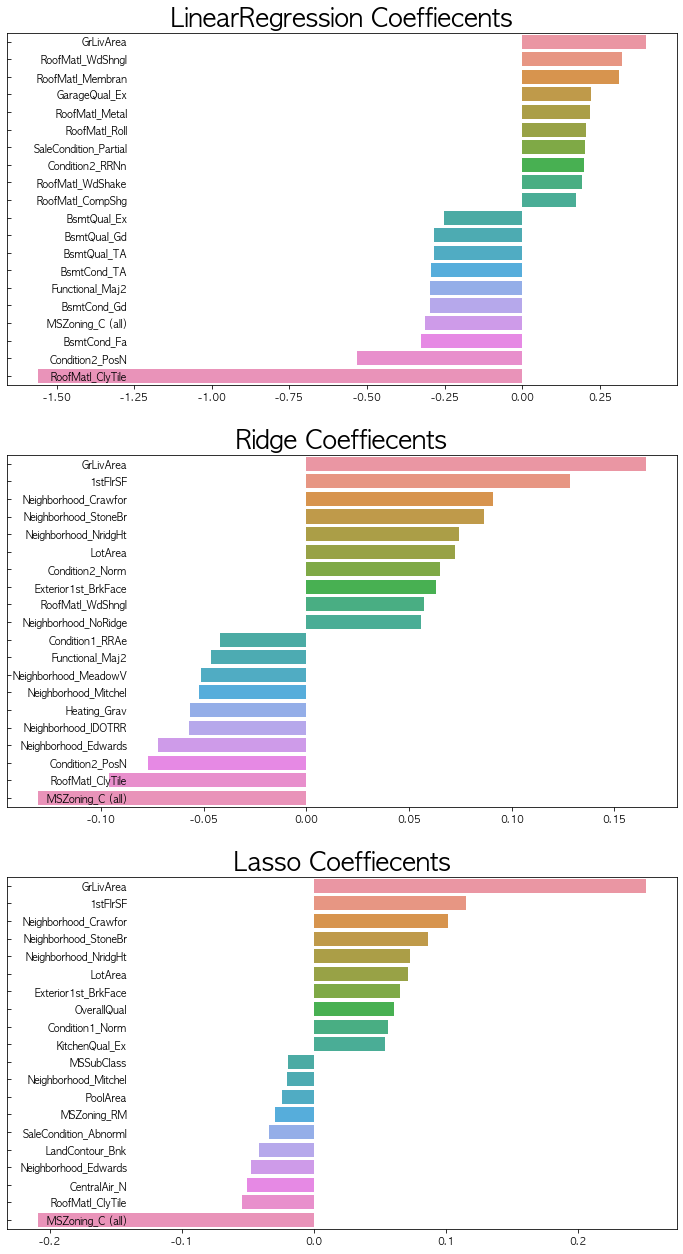

In [33]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## GrLivArea 피처의 데이터 분포 확인

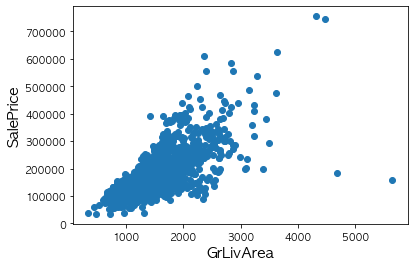

In [34]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

## 이상치 제거

In [35]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 house_df_ohe shape: (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape: (1458, 271)


## 이상치 제거 후 모델 학습

In [36]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


## 회귀 계수 시각화

LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.103
Lasso 로그 변환된 RMSE: 0.1


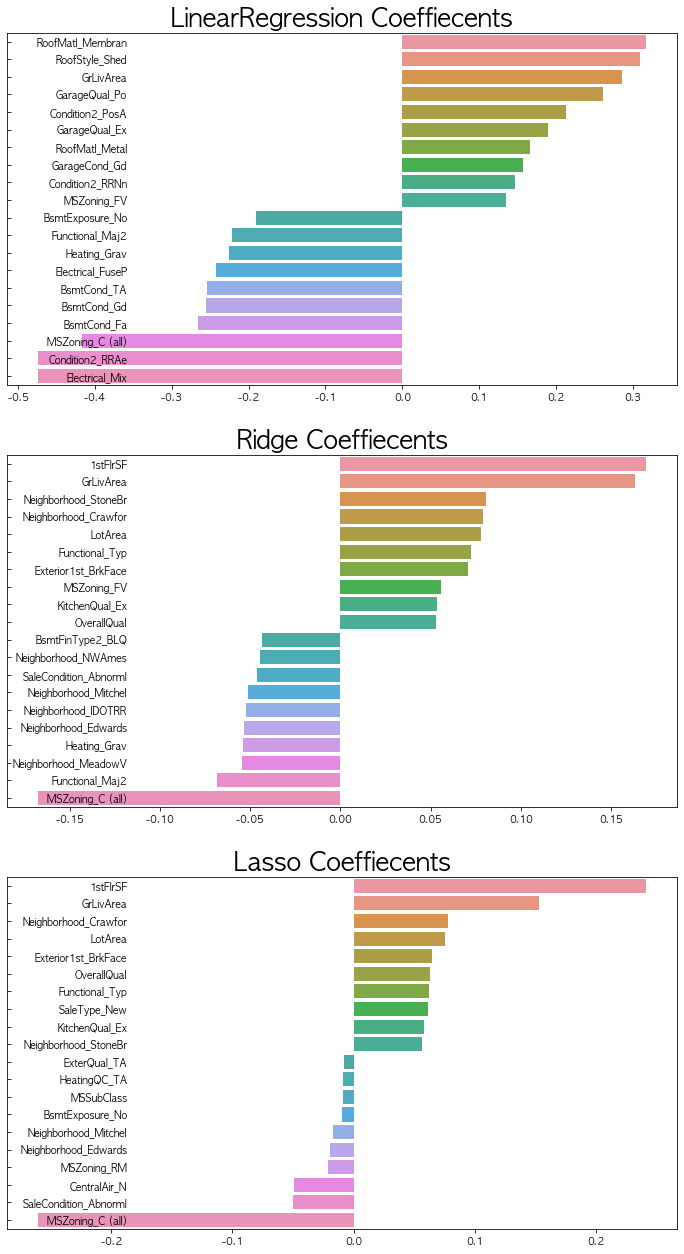

In [37]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

## XGB 모델을 이용한 학습

In [38]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1197, 최적 alpha:{'n_estimators': 1000}


## LGBM 모델을 이용한 학습

In [39]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1163, 최적 alpha:{'n_estimators': 1000}


## 피처의 중요도 시각화

In [40]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(15,15),nrows=2, ncols=1)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        plt.subplots_adjust(hspace=0.35)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])


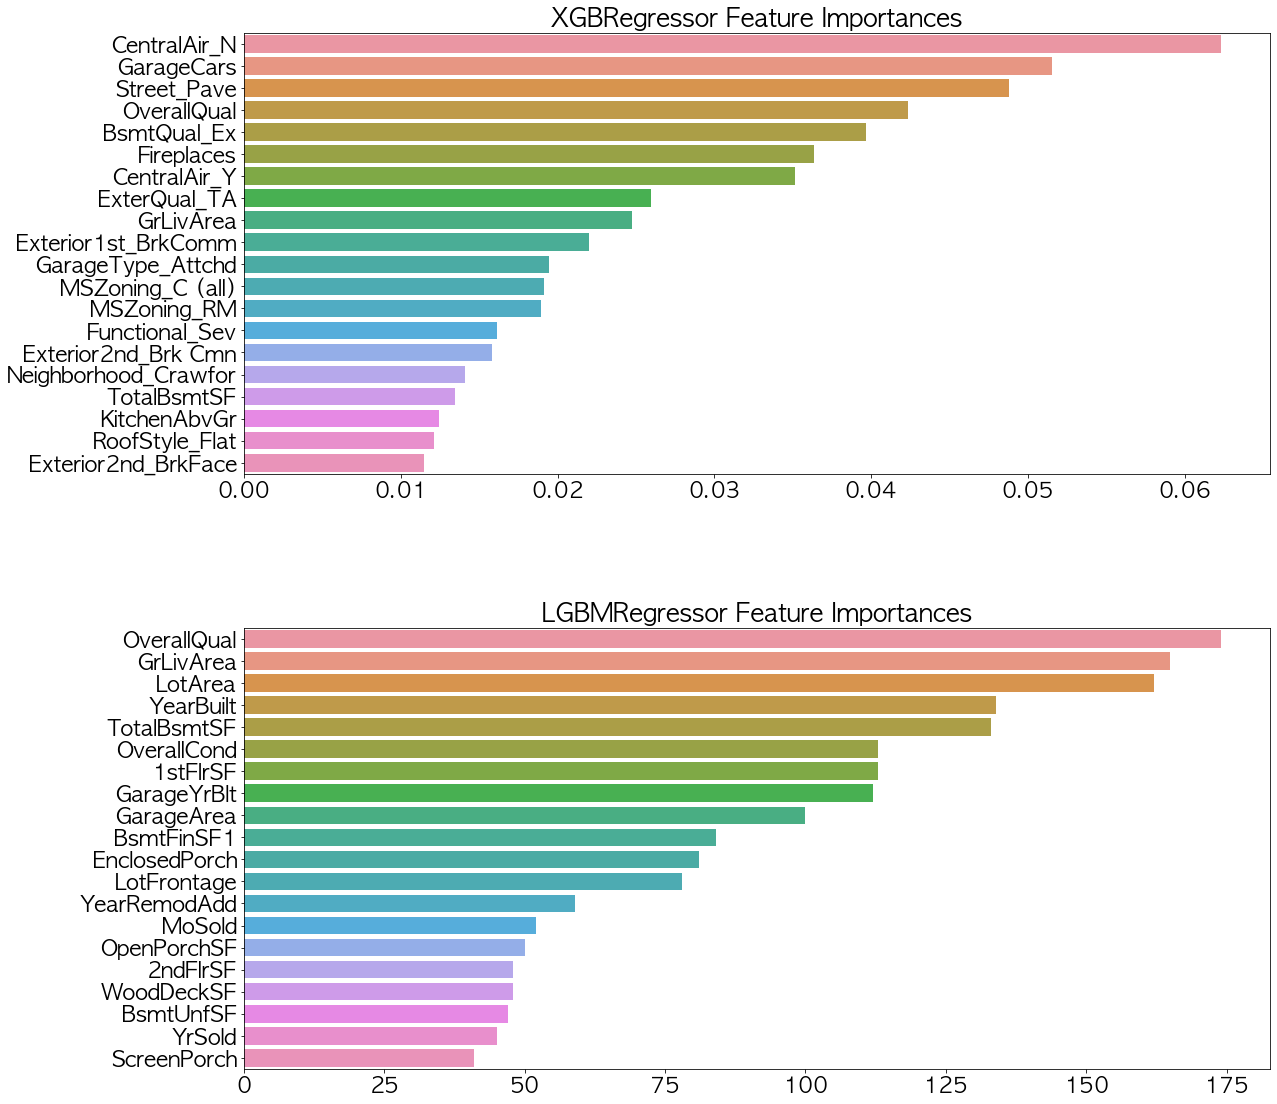

In [41]:
# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)


## 라쏘 모델 과 릿지 모델 혼합

In [42]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)


최종 혼합 모델의 RMSE: 0.10007930884470519
Ridge 모델의 RMSE: 0.1034517754660327
Lasso 모델의 RMSE: 0.10024170460890042


## XGB 모델 과 LGBM 모델 혼합

In [43]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10277689340617208
XGBM 모델의 RMSE: 0.10946473825650248
LGBM 모델의 RMSE: 0.10382510019327311


## 스태킹 앙상블 모델을 이용한 회귀  

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean


In [45]:
 
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)


Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [46]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09835017300724419


# 캐글 산탄데르 고객 만족 예측

## 데이터 전처리

### 데이터 가져오기

In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./data/santander/train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


### 데이터 정보 확인

In [91]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [92]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [93]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


### 피처 데이터 와 레이블 데이터 분리

In [94]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


### 훈련 데이터 와 테스트 데이터 분리

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 모델 학습 과 하이퍼 파라미터 튜닝 

### XGBoost 모델 학습

In [96]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

### 하이퍼 파라미터 튜닝

In [97]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72220	validation_1-auc:0.72732
[1]	validation_0-auc:0.73513	validation_1-auc:0.73851
[2]	validation_0-auc:0.81328	validation_1-auc:0.81902
[3]	validation_0-auc:0.82198	validation_1-auc:0.82516
[4]	validation_0-auc:0.83082	validation_1-auc:0.83442
[5]	validation_0-auc:0.83232	validation_1-auc:0.83225
[6]	validation_0-auc:0.83027	validation_1-auc:0.83048
[7]	validation_0-auc:0.83946	validation_1-auc:0.83795
[8]	validation_0-auc:0.83789	validation_1-auc:0.83474
[9]	validation_0-auc:0.83574	validation_1-auc:0.83253
[10]	validation_0-auc:0.84507	validation_1-auc:0.83837
[11]	validation_0-auc:0.84854	validation_1-auc:0.83927
[12]	validation_0-auc:0.85111	validation_1-auc:0.83835
[13]	validation_0-auc:0.85258	validation_1-auc:0.83676
[14]	validation_0-auc:0.85447	validation_1-auc:0.83708
[15]	validation_0-auc:0.85639	validation_1-auc:0.83754
[16]	validation_0-auc:0.85745	validation_1-auc:0.83598
[17]	validation_0-auc:0.85845	validation_1-auc:0.83724
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70913	validation_1-auc:0.71991
[1]	validation_0-auc:0.73241	validation_1-auc:0.73977
[2]	validation_0-auc:0.81520	validation_1-auc:0.81881
[3]	validation_0-auc:0.82575	validation_1-auc:0.82698
[4]	validation_0-auc:0.83703	validation_1-auc:0.83613
[5]	validation_0-auc:0.84110	validation_1-auc:0.83536
[6]	validation_0-auc:0.83962	validation_1-auc:0.83714
[7]	validation_0-auc:0.84471	validation_1-auc:0.83745
[8]	validation_0-auc:0.84368	validation_1-auc:0.83491
[9]	validation_0-auc:0.84142	validation_1-auc:0.83409
[10]	validation_0-auc:0.84969	validation_1-auc:0.83703
[11]	validation_0-auc:0.85247	validation_1-auc:0.83922
[12]	validation_0-auc:0.85486	validation_1-auc:0.83894
[13]	validation_0-auc:0.85653	validation_1-auc:0.83878
[14]	validation_0-auc:0.85761	validation_1-auc:0.83765
[15]	validation_0-auc:0.85940	validation_1-auc:0.83839
[16]	validation_0-auc:0.85977	validation_1-auc:0.83825
[17]	validation_0-auc:0.86104	validation_1-auc:0.83951
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.69700	validation_1-auc:0.70340
[1]	validation_0-auc:0.73289	validation_1-auc:0.73540
[2]	validation_0-auc:0.81670	validation_1-auc:0.81105
[3]	validation_0-auc:0.83054	validation_1-auc:0.82589
[4]	validation_0-auc:0.83677	validation_1-auc:0.82978
[5]	validation_0-auc:0.83828	validation_1-auc:0.83194
[6]	validation_0-auc:0.83828	validation_1-auc:0.83341
[7]	validation_0-auc:0.84263	validation_1-auc:0.83412
[8]	validation_0-auc:0.84237	validation_1-auc:0.83341
[9]	validation_0-auc:0.84232	validation_1-auc:0.83262
[10]	validation_0-auc:0.84968	validation_1-auc:0.83710
[11]	validation_0-auc:0.85327	validation_1-auc:0.83806
[12]	validation_0-auc:0.85569	validation_1-auc:0.83908
[13]	validation_0-auc:0.85684	validation_1-auc:0.83850
[14]	validation_0-auc:0.85794	validation_1-auc:0.83859
[15]	validation_0-auc:0.86034	validation_1-auc:0.83965
[16]	validation_0-auc:0.86122	validation_1-auc:0.83938
[17]	validation_0-auc:0.86298	validation_1-auc:0.84058
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72207	validation_1-auc:0.72723
[1]	validation_0-auc:0.73687	validation_1-auc:0.74013
[2]	validation_0-auc:0.81378	validation_1-auc:0.81961
[3]	validation_0-auc:0.82266	validation_1-auc:0.82451
[4]	validation_0-auc:0.83247	validation_1-auc:0.83372
[5]	validation_0-auc:0.83642	validation_1-auc:0.83544
[6]	validation_0-auc:0.83249	validation_1-auc:0.83077
[7]	validation_0-auc:0.84021	validation_1-auc:0.83770
[8]	validation_0-auc:0.83855	validation_1-auc:0.83418
[9]	validation_0-auc:0.83615	validation_1-auc:0.83134
[10]	validation_0-auc:0.84633	validation_1-auc:0.83740
[11]	validation_0-auc:0.84861	validation_1-auc:0.83944
[12]	validation_0-auc:0.85061	validation_1-auc:0.83998
[13]	validation_0-auc:0.85196	validation_1-auc:0.84092
[14]	validation_0-auc:0.85336	validation_1-auc:0.83944
[15]	validation_0-auc:0.85556	validation_1-auc:0.84150
[16]	validation_0-auc:0.85659	validation_1-auc:0.84152
[17]	validation_0-auc:0.85771	validation_1-auc:0.84198
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70841	validation_1-auc:0.71760
[1]	validation_0-auc:0.73166	validation_1-auc:0.73854
[2]	validation_0-auc:0.81662	validation_1-auc:0.81949
[3]	validation_0-auc:0.82754	validation_1-auc:0.82903
[4]	validation_0-auc:0.83738	validation_1-auc:0.83775
[5]	validation_0-auc:0.84076	validation_1-auc:0.83761
[6]	validation_0-auc:0.83902	validation_1-auc:0.83812
[7]	validation_0-auc:0.84368	validation_1-auc:0.83885
[8]	validation_0-auc:0.84266	validation_1-auc:0.83606
[9]	validation_0-auc:0.84082	validation_1-auc:0.83433
[10]	validation_0-auc:0.84810	validation_1-auc:0.83832
[11]	validation_0-auc:0.85093	validation_1-auc:0.83985
[12]	validation_0-auc:0.85286	validation_1-auc:0.84182
[13]	validation_0-auc:0.85369	validation_1-auc:0.84229
[14]	validation_0-auc:0.85411	validation_1-auc:0.84169
[15]	validation_0-auc:0.85639	validation_1-auc:0.84274
[16]	validation_0-auc:0.85711	validation_1-auc:0.84311
[17]	validation_0-auc:0.85818	validation_1-auc:0.84384
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70992	validation_1-auc:0.71425
[1]	validation_0-auc:0.74018	validation_1-auc:0.73974
[2]	validation_0-auc:0.81489	validation_1-auc:0.81252
[3]	validation_0-auc:0.82851	validation_1-auc:0.82628
[4]	validation_0-auc:0.83564	validation_1-auc:0.83172
[5]	validation_0-auc:0.83740	validation_1-auc:0.83199
[6]	validation_0-auc:0.83723	validation_1-auc:0.83230
[7]	validation_0-auc:0.84310	validation_1-auc:0.83347
[8]	validation_0-auc:0.84279	validation_1-auc:0.83244
[9]	validation_0-auc:0.84028	validation_1-auc:0.83096
[10]	validation_0-auc:0.84741	validation_1-auc:0.83810
[11]	validation_0-auc:0.85115	validation_1-auc:0.83875
[12]	validation_0-auc:0.85346	validation_1-auc:0.84128
[13]	validation_0-auc:0.85392	validation_1-auc:0.83945
[14]	validation_0-auc:0.85448	validation_1-auc:0.83938
[15]	validation_0-auc:0.85643	validation_1-auc:0.84079
[16]	validation_0-auc:0.85693	validation_1-auc:0.84118
[17]	validation_0-auc:0.85952	validation_1-auc:0.84080
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72439	validation_1-auc:0.72737
[1]	validation_0-auc:0.73938	validation_1-auc:0.73942
[2]	validation_0-auc:0.81562	validation_1-auc:0.81645
[3]	validation_0-auc:0.83036	validation_1-auc:0.82345
[4]	validation_0-auc:0.84019	validation_1-auc:0.83140
[5]	validation_0-auc:0.84594	validation_1-auc:0.83409
[6]	validation_0-auc:0.84543	validation_1-auc:0.82949
[7]	validation_0-auc:0.85446	validation_1-auc:0.83333
[8]	validation_0-auc:0.85328	validation_1-auc:0.83011
[9]	validation_0-auc:0.85138	validation_1-auc:0.82921
[10]	validation_0-auc:0.85948	validation_1-auc:0.83570
[11]	validation_0-auc:0.86519	validation_1-auc:0.83706
[12]	validation_0-auc:0.86816	validation_1-auc:0.83672
[13]	validation_0-auc:0.86957	validation_1-auc:0.83495
[14]	validation_0-auc:0.87117	validation_1-auc:0.83292
[15]	validation_0-auc:0.87323	validation_1-auc:0.83516
[16]	validation_0-auc:0.87455	validation_1-auc:0.83507
[17]	validation_0-auc:0.87643	validation_1-auc:0.83566
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71077	validation_1-auc:0.71902
[1]	validation_0-auc:0.73577	validation_1-auc:0.74042
[2]	validation_0-auc:0.82095	validation_1-auc:0.81861
[3]	validation_0-auc:0.83815	validation_1-auc:0.83096
[4]	validation_0-auc:0.84642	validation_1-auc:0.83655
[5]	validation_0-auc:0.85196	validation_1-auc:0.83716
[6]	validation_0-auc:0.85104	validation_1-auc:0.83579
[7]	validation_0-auc:0.85877	validation_1-auc:0.83711
[8]	validation_0-auc:0.85806	validation_1-auc:0.83593
[9]	validation_0-auc:0.85826	validation_1-auc:0.83425
[10]	validation_0-auc:0.86523	validation_1-auc:0.83838
[11]	validation_0-auc:0.86994	validation_1-auc:0.83865
[12]	validation_0-auc:0.87253	validation_1-auc:0.84046
[13]	validation_0-auc:0.87309	validation_1-auc:0.84103
[14]	validation_0-auc:0.87443	validation_1-auc:0.83968
[15]	validation_0-auc:0.87708	validation_1-auc:0.84094
[16]	validation_0-auc:0.87772	validation_1-auc:0.84170
[17]	validation_0-auc:0.87910	validation_1-auc:0.84249
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70992	validation_1-auc:0.71081
[1]	validation_0-auc:0.74404	validation_1-auc:0.74272
[2]	validation_0-auc:0.82017	validation_1-auc:0.81563
[3]	validation_0-auc:0.83551	validation_1-auc:0.82595
[4]	validation_0-auc:0.84346	validation_1-auc:0.83063
[5]	validation_0-auc:0.84771	validation_1-auc:0.83389
[6]	validation_0-auc:0.84758	validation_1-auc:0.83100
[7]	validation_0-auc:0.85390	validation_1-auc:0.83135
[8]	validation_0-auc:0.85559	validation_1-auc:0.82946
[9]	validation_0-auc:0.85545	validation_1-auc:0.82562
[10]	validation_0-auc:0.86350	validation_1-auc:0.83294
[11]	validation_0-auc:0.86895	validation_1-auc:0.83498
[12]	validation_0-auc:0.87152	validation_1-auc:0.83802
[13]	validation_0-auc:0.87225	validation_1-auc:0.83687
[14]	validation_0-auc:0.87323	validation_1-auc:0.83478
[15]	validation_0-auc:0.87590	validation_1-auc:0.83753
[16]	validation_0-auc:0.87588	validation_1-auc:0.83708
[17]	validation_0-auc:0.87787	validation_1-auc:0.83887
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72375	validation_1-auc:0.72754
[1]	validation_0-auc:0.74058	validation_1-auc:0.73969
[2]	validation_0-auc:0.81581	validation_1-auc:0.81555
[3]	validation_0-auc:0.83176	validation_1-auc:0.82812
[4]	validation_0-auc:0.84028	validation_1-auc:0.83576
[5]	validation_0-auc:0.84506	validation_1-auc:0.83679
[6]	validation_0-auc:0.84401	validation_1-auc:0.83358
[7]	validation_0-auc:0.85267	validation_1-auc:0.83734
[8]	validation_0-auc:0.85146	validation_1-auc:0.83318
[9]	validation_0-auc:0.84991	validation_1-auc:0.83115
[10]	validation_0-auc:0.85726	validation_1-auc:0.83630
[11]	validation_0-auc:0.86184	validation_1-auc:0.83718
[12]	validation_0-auc:0.86435	validation_1-auc:0.83746
[13]	validation_0-auc:0.86503	validation_1-auc:0.83709
[14]	validation_0-auc:0.86592	validation_1-auc:0.83527
[15]	validation_0-auc:0.86806	validation_1-auc:0.83753
[16]	validation_0-auc:0.86835	validation_1-auc:0.83667
[17]	validation_0-auc:0.87012	validation_1-auc:0.83739
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71171	validation_1-auc:0.71788
[1]	validation_0-auc:0.73693	validation_1-auc:0.74138
[2]	validation_0-auc:0.82320	validation_1-auc:0.82077
[3]	validation_0-auc:0.83940	validation_1-auc:0.83067
[4]	validation_0-auc:0.84688	validation_1-auc:0.83553
[5]	validation_0-auc:0.85056	validation_1-auc:0.83589
[6]	validation_0-auc:0.84834	validation_1-auc:0.83450
[7]	validation_0-auc:0.85583	validation_1-auc:0.83715
[8]	validation_0-auc:0.85399	validation_1-auc:0.83463
[9]	validation_0-auc:0.85359	validation_1-auc:0.83333
[10]	validation_0-auc:0.86138	validation_1-auc:0.83687
[11]	validation_0-auc:0.86598	validation_1-auc:0.83882
[12]	validation_0-auc:0.86867	validation_1-auc:0.84003
[13]	validation_0-auc:0.86953	validation_1-auc:0.83959
[14]	validation_0-auc:0.87124	validation_1-auc:0.83770
[15]	validation_0-auc:0.87329	validation_1-auc:0.83810
[16]	validation_0-auc:0.87342	validation_1-auc:0.83825
[17]	validation_0-auc:0.87481	validation_1-auc:0.83991
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71011	validation_1-auc:0.71403
[1]	validation_0-auc:0.75547	validation_1-auc:0.74961
[2]	validation_0-auc:0.82389	validation_1-auc:0.81445
[3]	validation_0-auc:0.83566	validation_1-auc:0.82347
[4]	validation_0-auc:0.84510	validation_1-auc:0.83167
[5]	validation_0-auc:0.84834	validation_1-auc:0.83303
[6]	validation_0-auc:0.84827	validation_1-auc:0.83088
[7]	validation_0-auc:0.85514	validation_1-auc:0.83281
[8]	validation_0-auc:0.85516	validation_1-auc:0.82924
[9]	validation_0-auc:0.85480	validation_1-auc:0.82766
[10]	validation_0-auc:0.86184	validation_1-auc:0.83311
[11]	validation_0-auc:0.86466	validation_1-auc:0.83504
[12]	validation_0-auc:0.86745	validation_1-auc:0.83809
[13]	validation_0-auc:0.86882	validation_1-auc:0.83713
[14]	validation_0-auc:0.86921	validation_1-auc:0.83542
[15]	validation_0-auc:0.87179	validation_1-auc:0.83763
[16]	validation_0-auc:0.87230	validation_1-auc:0.83828
[17]	validation_0-auc:0.87473	validation_1-auc:0.84019
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72072	validation_1-auc:0.72578
[1]	validation_0-auc:0.73625	validation_1-auc:0.73868
[2]	validation_0-auc:0.80301	validation_1-auc:0.80850
[3]	validation_0-auc:0.82118	validation_1-auc:0.82180
[4]	validation_0-auc:0.83338	validation_1-auc:0.82992
[5]	validation_0-auc:0.83903	validation_1-auc:0.83331
[6]	validation_0-auc:0.83583	validation_1-auc:0.82833
[7]	validation_0-auc:0.84173	validation_1-auc:0.83340
[8]	validation_0-auc:0.84256	validation_1-auc:0.83295
[9]	validation_0-auc:0.84181	validation_1-auc:0.82992
[10]	validation_0-auc:0.84915	validation_1-auc:0.83522
[11]	validation_0-auc:0.85258	validation_1-auc:0.83905
[12]	validation_0-auc:0.85494	validation_1-auc:0.84056
[13]	validation_0-auc:0.85579	validation_1-auc:0.83961
[14]	validation_0-auc:0.85725	validation_1-auc:0.84032
[15]	validation_0-auc:0.85900	validation_1-auc:0.84053
[16]	validation_0-auc:0.86022	validation_1-auc:0.84038
[17]	validation_0-auc:0.86181	validation_1-auc:0.84012
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72766	validation_1-auc:0.73437
[1]	validation_0-auc:0.74617	validation_1-auc:0.75059
[2]	validation_0-auc:0.81052	validation_1-auc:0.81275
[3]	validation_0-auc:0.82734	validation_1-auc:0.82913
[4]	validation_0-auc:0.83657	validation_1-auc:0.83309
[5]	validation_0-auc:0.84226	validation_1-auc:0.83513
[6]	validation_0-auc:0.84054	validation_1-auc:0.83361
[7]	validation_0-auc:0.84642	validation_1-auc:0.83655
[8]	validation_0-auc:0.84641	validation_1-auc:0.83613
[9]	validation_0-auc:0.84520	validation_1-auc:0.83550
[10]	validation_0-auc:0.85249	validation_1-auc:0.83822
[11]	validation_0-auc:0.85493	validation_1-auc:0.83944
[12]	validation_0-auc:0.85745	validation_1-auc:0.84071
[13]	validation_0-auc:0.85780	validation_1-auc:0.84060
[14]	validation_0-auc:0.85987	validation_1-auc:0.84051
[15]	validation_0-auc:0.86125	validation_1-auc:0.84128
[16]	validation_0-auc:0.86238	validation_1-auc:0.84173
[17]	validation_0-auc:0.86392	validation_1-auc:0.84156
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72262	validation_1-auc:0.72749
[1]	validation_0-auc:0.74619	validation_1-auc:0.74779
[2]	validation_0-auc:0.81650	validation_1-auc:0.81803
[3]	validation_0-auc:0.82850	validation_1-auc:0.82607
[4]	validation_0-auc:0.83527	validation_1-auc:0.82811
[5]	validation_0-auc:0.84220	validation_1-auc:0.83298
[6]	validation_0-auc:0.84159	validation_1-auc:0.83035
[7]	validation_0-auc:0.84653	validation_1-auc:0.83289
[8]	validation_0-auc:0.84557	validation_1-auc:0.83107
[9]	validation_0-auc:0.84423	validation_1-auc:0.83035
[10]	validation_0-auc:0.85170	validation_1-auc:0.83529
[11]	validation_0-auc:0.85533	validation_1-auc:0.83743
[12]	validation_0-auc:0.85718	validation_1-auc:0.83957
[13]	validation_0-auc:0.85779	validation_1-auc:0.83884
[14]	validation_0-auc:0.85999	validation_1-auc:0.83964
[15]	validation_0-auc:0.86147	validation_1-auc:0.83928
[16]	validation_0-auc:0.86335	validation_1-auc:0.83955
[17]	validation_0-auc:0.86489	validation_1-auc:0.83894
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72324	validation_1-auc:0.72891
[1]	validation_0-auc:0.74133	validation_1-auc:0.74360
[2]	validation_0-auc:0.80929	validation_1-auc:0.81326
[3]	validation_0-auc:0.82201	validation_1-auc:0.82381
[4]	validation_0-auc:0.83305	validation_1-auc:0.83097
[5]	validation_0-auc:0.83852	validation_1-auc:0.83373
[6]	validation_0-auc:0.83739	validation_1-auc:0.83013
[7]	validation_0-auc:0.84380	validation_1-auc:0.83406
[8]	validation_0-auc:0.84261	validation_1-auc:0.83027
[9]	validation_0-auc:0.84166	validation_1-auc:0.82781
[10]	validation_0-auc:0.84924	validation_1-auc:0.83315
[11]	validation_0-auc:0.85290	validation_1-auc:0.83756
[12]	validation_0-auc:0.85452	validation_1-auc:0.83665
[13]	validation_0-auc:0.85567	validation_1-auc:0.83529
[14]	validation_0-auc:0.85639	validation_1-auc:0.83674
[15]	validation_0-auc:0.85768	validation_1-auc:0.83819
[16]	validation_0-auc:0.85916	validation_1-auc:0.83838
[17]	validation_0-auc:0.86043	validation_1-auc:0.83915
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73583	validation_1-auc:0.74158
[1]	validation_0-auc:0.75273	validation_1-auc:0.75777
[2]	validation_0-auc:0.81897	validation_1-auc:0.82024
[3]	validation_0-auc:0.82997	validation_1-auc:0.83286
[4]	validation_0-auc:0.83780	validation_1-auc:0.83711
[5]	validation_0-auc:0.84305	validation_1-auc:0.83876
[6]	validation_0-auc:0.84122	validation_1-auc:0.83552
[7]	validation_0-auc:0.84718	validation_1-auc:0.83650
[8]	validation_0-auc:0.84497	validation_1-auc:0.83644
[9]	validation_0-auc:0.84337	validation_1-auc:0.83614
[10]	validation_0-auc:0.84957	validation_1-auc:0.83961
[11]	validation_0-auc:0.85361	validation_1-auc:0.84163
[12]	validation_0-auc:0.85551	validation_1-auc:0.84233
[13]	validation_0-auc:0.85542	validation_1-auc:0.84201
[14]	validation_0-auc:0.85752	validation_1-auc:0.84174
[15]	validation_0-auc:0.85868	validation_1-auc:0.84215
[16]	validation_0-auc:0.85922	validation_1-auc:0.84206
[17]	validation_0-auc:0.86032	validation_1-auc:0.84207
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72717	validation_1-auc:0.72586
[1]	validation_0-auc:0.75162	validation_1-auc:0.74899
[2]	validation_0-auc:0.81727	validation_1-auc:0.81174
[3]	validation_0-auc:0.82960	validation_1-auc:0.82681
[4]	validation_0-auc:0.83661	validation_1-auc:0.82957
[5]	validation_0-auc:0.84084	validation_1-auc:0.83400
[6]	validation_0-auc:0.83919	validation_1-auc:0.83035
[7]	validation_0-auc:0.84441	validation_1-auc:0.83275
[8]	validation_0-auc:0.84412	validation_1-auc:0.83236
[9]	validation_0-auc:0.84254	validation_1-auc:0.83042
[10]	validation_0-auc:0.84938	validation_1-auc:0.83476
[11]	validation_0-auc:0.85279	validation_1-auc:0.83759
[12]	validation_0-auc:0.85530	validation_1-auc:0.83910
[13]	validation_0-auc:0.85624	validation_1-auc:0.83663
[14]	validation_0-auc:0.85791	validation_1-auc:0.83765
[15]	validation_0-auc:0.85943	validation_1-auc:0.83707
[16]	validation_0-auc:0.86011	validation_1-auc:0.83873
[17]	validation_0-auc:0.86126	validation_1-auc:0.83856
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72503	validation_1-auc:0.72900
[1]	validation_0-auc:0.74102	validation_1-auc:0.74215
[2]	validation_0-auc:0.81290	validation_1-auc:0.81210
[3]	validation_0-auc:0.83255	validation_1-auc:0.82562
[4]	validation_0-auc:0.84116	validation_1-auc:0.83193
[5]	validation_0-auc:0.84825	validation_1-auc:0.83519
[6]	validation_0-auc:0.84848	validation_1-auc:0.83044
[7]	validation_0-auc:0.85640	validation_1-auc:0.83540
[8]	validation_0-auc:0.85547	validation_1-auc:0.83215
[9]	validation_0-auc:0.85644	validation_1-auc:0.83108
[10]	validation_0-auc:0.86322	validation_1-auc:0.83489
[11]	validation_0-auc:0.86907	validation_1-auc:0.83781
[12]	validation_0-auc:0.87309	validation_1-auc:0.83854
[13]	validation_0-auc:0.87408	validation_1-auc:0.83708
[14]	validation_0-auc:0.87604	validation_1-auc:0.83756
[15]	validation_0-auc:0.87752	validation_1-auc:0.83704
[16]	validation_0-auc:0.88053	validation_1-auc:0.83585
[17]	validation_0-auc:0.88145	validation_1-auc:0.83646
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74226	validation_1-auc:0.74184
[1]	validation_0-auc:0.76547	validation_1-auc:0.76114
[2]	validation_0-auc:0.82744	validation_1-auc:0.81840
[3]	validation_0-auc:0.84210	validation_1-auc:0.83304
[4]	validation_0-auc:0.84930	validation_1-auc:0.83931
[5]	validation_0-auc:0.85606	validation_1-auc:0.83771
[6]	validation_0-auc:0.85467	validation_1-auc:0.83295
[7]	validation_0-auc:0.86053	validation_1-auc:0.83523
[8]	validation_0-auc:0.86072	validation_1-auc:0.83296
[9]	validation_0-auc:0.86087	validation_1-auc:0.83147
[10]	validation_0-auc:0.86853	validation_1-auc:0.83601
[11]	validation_0-auc:0.87381	validation_1-auc:0.83673
[12]	validation_0-auc:0.87717	validation_1-auc:0.83802
[13]	validation_0-auc:0.87838	validation_1-auc:0.83791
[14]	validation_0-auc:0.88145	validation_1-auc:0.83921
[15]	validation_0-auc:0.88303	validation_1-auc:0.83842
[16]	validation_0-auc:0.88427	validation_1-auc:0.83881
[17]	validation_0-auc:0.88487	validation_1-auc:0.83979
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73604	validation_1-auc:0.73972
[1]	validation_0-auc:0.75848	validation_1-auc:0.75428
[2]	validation_0-auc:0.82656	validation_1-auc:0.81871
[3]	validation_0-auc:0.83765	validation_1-auc:0.82732
[4]	validation_0-auc:0.84640	validation_1-auc:0.83244
[5]	validation_0-auc:0.85291	validation_1-auc:0.83518
[6]	validation_0-auc:0.85386	validation_1-auc:0.83215
[7]	validation_0-auc:0.86053	validation_1-auc:0.83299
[8]	validation_0-auc:0.85996	validation_1-auc:0.83277
[9]	validation_0-auc:0.86067	validation_1-auc:0.83176
[10]	validation_0-auc:0.86832	validation_1-auc:0.83433
[11]	validation_0-auc:0.87277	validation_1-auc:0.83606
[12]	validation_0-auc:0.87548	validation_1-auc:0.83921
[13]	validation_0-auc:0.87691	validation_1-auc:0.83815
[14]	validation_0-auc:0.87942	validation_1-auc:0.83738
[15]	validation_0-auc:0.88101	validation_1-auc:0.83712
[16]	validation_0-auc:0.88296	validation_1-auc:0.83734
[17]	validation_0-auc:0.88406	validation_1-auc:0.83783
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72638	validation_1-auc:0.73234
[1]	validation_0-auc:0.74242	validation_1-auc:0.74574
[2]	validation_0-auc:0.81532	validation_1-auc:0.81601
[3]	validation_0-auc:0.83283	validation_1-auc:0.82810
[4]	validation_0-auc:0.84332	validation_1-auc:0.83575
[5]	validation_0-auc:0.84938	validation_1-auc:0.83907
[6]	validation_0-auc:0.84894	validation_1-auc:0.83272
[7]	validation_0-auc:0.85535	validation_1-auc:0.83596
[8]	validation_0-auc:0.85467	validation_1-auc:0.83443
[9]	validation_0-auc:0.85415	validation_1-auc:0.83202
[10]	validation_0-auc:0.86121	validation_1-auc:0.83453
[11]	validation_0-auc:0.86636	validation_1-auc:0.83679
[12]	validation_0-auc:0.86906	validation_1-auc:0.83627
[13]	validation_0-auc:0.86993	validation_1-auc:0.83458
[14]	validation_0-auc:0.87147	validation_1-auc:0.83543
[15]	validation_0-auc:0.87264	validation_1-auc:0.83699
[16]	validation_0-auc:0.87411	validation_1-auc:0.83732
[17]	validation_0-auc:0.87495	validation_1-auc:0.83630
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74200	validation_1-auc:0.74116
[1]	validation_0-auc:0.75955	validation_1-auc:0.75707
[2]	validation_0-auc:0.82727	validation_1-auc:0.82101
[3]	validation_0-auc:0.84050	validation_1-auc:0.83482
[4]	validation_0-auc:0.84695	validation_1-auc:0.83888
[5]	validation_0-auc:0.85271	validation_1-auc:0.83928
[6]	validation_0-auc:0.85198	validation_1-auc:0.83294
[7]	validation_0-auc:0.85779	validation_1-auc:0.83469
[8]	validation_0-auc:0.85641	validation_1-auc:0.83597
[9]	validation_0-auc:0.85468	validation_1-auc:0.83162
[10]	validation_0-auc:0.86324	validation_1-auc:0.83527
[11]	validation_0-auc:0.86786	validation_1-auc:0.83681
[12]	validation_0-auc:0.87104	validation_1-auc:0.83835
[13]	validation_0-auc:0.87136	validation_1-auc:0.83781
[14]	validation_0-auc:0.87343	validation_1-auc:0.83859
[15]	validation_0-auc:0.87469	validation_1-auc:0.83923
[16]	validation_0-auc:0.87579	validation_1-auc:0.83921
[17]	validation_0-auc:0.87709	validation_1-auc:0.83896
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74303	validation_1-auc:0.74424
[1]	validation_0-auc:0.77101	validation_1-auc:0.76843
[2]	validation_0-auc:0.82663	validation_1-auc:0.81971
[3]	validation_0-auc:0.84132	validation_1-auc:0.82740
[4]	validation_0-auc:0.84968	validation_1-auc:0.83392
[5]	validation_0-auc:0.85221	validation_1-auc:0.83473
[6]	validation_0-auc:0.85279	validation_1-auc:0.83000
[7]	validation_0-auc:0.85844	validation_1-auc:0.83304
[8]	validation_0-auc:0.85742	validation_1-auc:0.82944
[9]	validation_0-auc:0.85781	validation_1-auc:0.82745
[10]	validation_0-auc:0.86438	validation_1-auc:0.83293
[11]	validation_0-auc:0.86867	validation_1-auc:0.83601
[12]	validation_0-auc:0.87059	validation_1-auc:0.83734
[13]	validation_0-auc:0.87175	validation_1-auc:0.83755
[14]	validation_0-auc:0.87370	validation_1-auc:0.83786
[15]	validation_0-auc:0.87490	validation_1-auc:0.83884
[16]	validation_0-auc:0.87631	validation_1-auc:0.83923
[17]	validation_0-auc:0.87758	validation_1-auc:0.83878
[18]	validation_0-au

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72191	validation_1-auc:0.72954
[1]	validation_0-auc:0.75536	validation_1-auc:0.75461
[2]	validation_0-auc:0.82761	validation_1-auc:0.82039
[3]	validation_0-auc:0.84343	validation_1-auc:0.83066
[4]	validation_0-auc:0.85255	validation_1-auc:0.83696
[5]	validation_0-auc:0.85720	validation_1-auc:0.83561
[6]	validation_0-auc:0.85675	validation_1-auc:0.83301
[7]	validation_0-auc:0.86477	validation_1-auc:0.83483
[8]	validation_0-auc:0.86438	validation_1-auc:0.83213
[9]	validation_0-auc:0.86357	validation_1-auc:0.83235
[10]	validation_0-auc:0.87038	validation_1-auc:0.83889
[11]	validation_0-auc:0.87397	validation_1-auc:0.84047
[12]	validation_0-auc:0.87609	validation_1-auc:0.84225
[13]	validation_0-auc:0.87766	validation_1-auc:0.84222
[14]	validation_0-auc:0.87922	validation_1-auc:0.84231
[15]	validation_0-auc:0.88155	validation_1-auc:0.84270
[16]	validation_0-auc:0.88192	validation_1-auc:0.84165
[17]	validation_0-auc:0.88298	validation_1-auc:0.84300
[18]	validation_0-au

In [98]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.74086	validation_1-auc:0.74459
[1]	validation_0-auc:0.75450	validation_1-auc:0.75761
[2]	validation_0-auc:0.81668	validation_1-auc:0.81412
[3]	validation_0-auc:0.81417	validation_1-auc:0.81044
[4]	validation_0-auc:0.82317	validation_1-auc:0.81900
[5]	validation_0-auc:0.82807	validation_1-auc:0.82227
[6]	validation_0-auc:0.83351	validation_1-auc:0.82896
[7]	validation_0-auc:0.83170	validation_1-auc:0.82739
[8]	validation_0-auc:0.83406	validation_1-auc:0.82851
[9]	validation_0-auc:0.83683	validation_1-auc:0.83110
[10]	validation_0-auc:0.83803	validation_1-auc:0.83260
[11]	validation_0-auc:0.83914	validation_1-auc:0.83305
[12]	validation_0-auc:0.83888	validation_1-auc:0.83191
[13]	validation_0-auc:0.84177	validation_1-auc:0.83439
[14]	validation_0-auc:0.84262	validation_1-auc:0.83549
[15]	validation_0-auc:0.84244	validation_1-auc:0.83477
[16]	validation_0-auc:0.84321	validation_1-auc:0.83568
[17]	validation_0-auc:0.84406	validation_1-auc:0.83579
[18]	validation_0-au

[149]	validation_0-auc:0.87046	validation_1-auc:0.84137
[150]	validation_0-auc:0.87038	validation_1-auc:0.84130
[151]	validation_0-auc:0.87036	validation_1-auc:0.84109
[152]	validation_0-auc:0.87066	validation_1-auc:0.84146
[153]	validation_0-auc:0.87068	validation_1-auc:0.84134
[154]	validation_0-auc:0.87101	validation_1-auc:0.84159
[155]	validation_0-auc:0.87083	validation_1-auc:0.84146
[156]	validation_0-auc:0.87092	validation_1-auc:0.84131
[157]	validation_0-auc:0.87100	validation_1-auc:0.84111
[158]	validation_0-auc:0.87152	validation_1-auc:0.84141
[159]	validation_0-auc:0.87188	validation_1-auc:0.84176
[160]	validation_0-auc:0.87192	validation_1-auc:0.84157
[161]	validation_0-auc:0.87235	validation_1-auc:0.84195
[162]	validation_0-auc:0.87232	validation_1-auc:0.84183
[163]	validation_0-auc:0.87231	validation_1-auc:0.84175
[164]	validation_0-auc:0.87269	validation_1-auc:0.84219
[165]	validation_0-auc:0.87271	validation_1-auc:0.84197
[166]	validation_0-auc:0.87293	validation_1-auc:

[296]	validation_0-auc:0.89430	validation_1-auc:0.84550
[297]	validation_0-auc:0.89440	validation_1-auc:0.84554
[298]	validation_0-auc:0.89444	validation_1-auc:0.84554
[299]	validation_0-auc:0.89451	validation_1-auc:0.84554
[300]	validation_0-auc:0.89464	validation_1-auc:0.84570
[301]	validation_0-auc:0.89467	validation_1-auc:0.84566
[302]	validation_0-auc:0.89478	validation_1-auc:0.84574
[303]	validation_0-auc:0.89480	validation_1-auc:0.84572
[304]	validation_0-auc:0.89485	validation_1-auc:0.84570
[305]	validation_0-auc:0.89494	validation_1-auc:0.84563
[306]	validation_0-auc:0.89503	validation_1-auc:0.84559
[307]	validation_0-auc:0.89514	validation_1-auc:0.84562
[308]	validation_0-auc:0.89527	validation_1-auc:0.84556
[309]	validation_0-auc:0.89535	validation_1-auc:0.84561
[310]	validation_0-auc:0.89538	validation_1-auc:0.84558
[311]	validation_0-auc:0.89551	validation_1-auc:0.84557
[312]	validation_0-auc:0.89560	validation_1-auc:0.84548
[313]	validation_0-auc:0.89573	validation_1-auc:

[443]	validation_0-auc:0.90343	validation_1-auc:0.84580
[444]	validation_0-auc:0.90346	validation_1-auc:0.84577
[445]	validation_0-auc:0.90349	validation_1-auc:0.84578
[446]	validation_0-auc:0.90351	validation_1-auc:0.84574
[447]	validation_0-auc:0.90352	validation_1-auc:0.84574
[448]	validation_0-auc:0.90355	validation_1-auc:0.84572
[449]	validation_0-auc:0.90355	validation_1-auc:0.84573
[450]	validation_0-auc:0.90357	validation_1-auc:0.84574
[451]	validation_0-auc:0.90360	validation_1-auc:0.84570
[452]	validation_0-auc:0.90364	validation_1-auc:0.84571
[453]	validation_0-auc:0.90365	validation_1-auc:0.84570
[454]	validation_0-auc:0.90369	validation_1-auc:0.84567
[455]	validation_0-auc:0.90372	validation_1-auc:0.84570
[456]	validation_0-auc:0.90373	validation_1-auc:0.84568
[457]	validation_0-auc:0.90377	validation_1-auc:0.84564
[458]	validation_0-auc:0.90380	validation_1-auc:0.84568
[459]	validation_0-auc:0.90381	validation_1-auc:0.84569
[460]	validation_0-auc:0.90382	validation_1-auc:

[590]	validation_0-auc:0.90952	validation_1-auc:0.84537
[591]	validation_0-auc:0.90953	validation_1-auc:0.84539
[592]	validation_0-auc:0.90955	validation_1-auc:0.84539
[593]	validation_0-auc:0.90957	validation_1-auc:0.84538
[594]	validation_0-auc:0.90958	validation_1-auc:0.84536
[595]	validation_0-auc:0.90960	validation_1-auc:0.84535
[596]	validation_0-auc:0.90961	validation_1-auc:0.84533
[597]	validation_0-auc:0.90962	validation_1-auc:0.84531
[598]	validation_0-auc:0.90965	validation_1-auc:0.84530
[599]	validation_0-auc:0.90967	validation_1-auc:0.84530
[600]	validation_0-auc:0.90968	validation_1-auc:0.84530
[601]	validation_0-auc:0.90969	validation_1-auc:0.84531
[602]	validation_0-auc:0.90970	validation_1-auc:0.84529
[603]	validation_0-auc:0.90971	validation_1-auc:0.84530
[604]	validation_0-auc:0.90973	validation_1-auc:0.84530
[605]	validation_0-auc:0.90975	validation_1-auc:0.84529
[606]	validation_0-auc:0.90976	validation_1-auc:0.84528
[607]	validation_0-auc:0.90979	validation_1-auc:

### 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

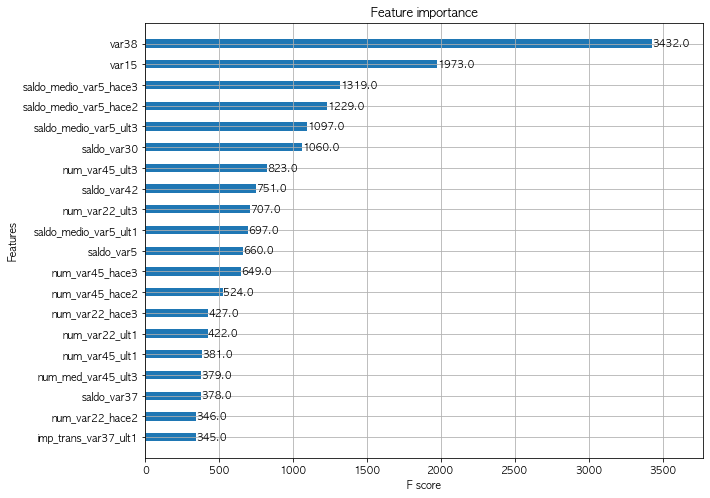

In [99]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## LightGBM 을 이용한 학습

### 모델 훈련

In [106]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

OSError: dlopen(/Users/adam/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/adam/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/oracle/instantclient_19_8/libomp.dylib' (no such file), '/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

### 하이퍼 파라미터 튜닝

In [105]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


NameError: name 'LGBMClassifier' is not defined

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

# 캐글 신용카드 사기 검출

## 데이터 일차 가공 및 모델 학습/예측/평가

### 데이터 가져오기

In [107]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### 데이터 가공

In [108]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


### 평가 지표 함수

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 로지스틱 회귀 적용

In [110]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,    F1: 0.7120, AUC:0.9588


### 모델 평가 함수

In [111]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### LightGBM 적용

In [112]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


OSError: dlopen(/Users/adam/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/adam/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/oracle/instantclient_19_8/libomp.dylib' (no such file), '/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

## 데이터 분포 변환 후 학슴 및 평가

### Amount 열의 분포 확인

<AxesSubplot:xlabel='Amount', ylabel='Density'>

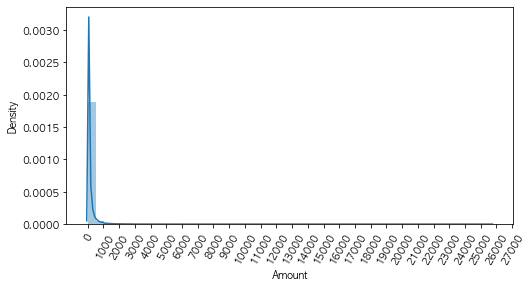

In [113]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

### 정규화 한 후 성능 측정

In [114]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###


NameError: name 'LGBMClassifier' is not defined

### 로그 변환 후 성능 측정

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 상관관계가 가장 높은 데이터 찾기

In [ ]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
print(corr['Class'])

### 이상치를 조회하는 함수

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

### 이상치 조회

In [115]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

NameError: name 'get_outlier' is not defined

### 이상치 제거 후 학습

In [116]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


NameError: name 'get_outlier' is not defined

## 오버 샘플링 후 학습

### 오버 샘플링

In [117]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

ModuleNotFoundError: No module named 'imblearn'

### 로직스틱 회귀 수행

In [118]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

NameError: name 'X_train_over' is not defined

### 정밀도 와 재현율 출력

In [119]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Light GBM 모델 학습

In [120]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

NameError: name 'LGBMClassifier' is not defined

# 신용 위험 모델링

## 기본 데이터 분석

### 데이터 전처리

In [121]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 데이터 읽어오기
training_data = pd.read_csv('./data/cs-training.csv').drop('Unnamed: 0', axis = 1)

#컬럼의 이름을 변경 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### EDA

In [122]:
#기술 통계 정보 확인
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [123]:
#중앙값
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [124]:
#평균
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [125]:
#도수분포표
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

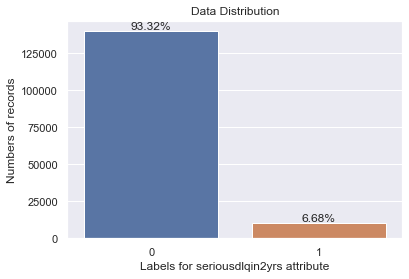

In [126]:
# 도수 시각화 - 막대 그래프
sns.set()
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

### 결측값 대치

In [127]:
#결측값 확인
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

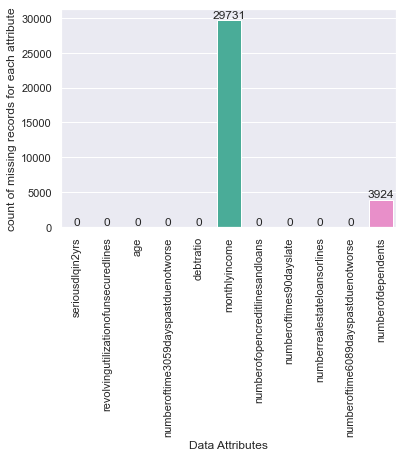

In [128]:
# 결측값 시각화
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [129]:
#결측값을 평균으로 대체
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [130]:
#결측값을 중위수로 대체
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

### 상관관계 파악

In [131]:
#상관계수 확인
training_data.fillna((training_data.median()), inplace=True)
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


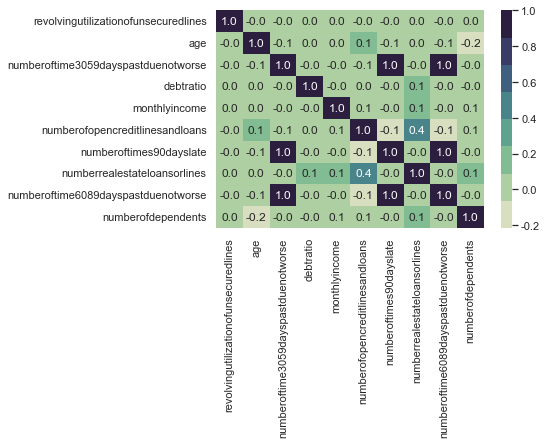

In [132]:
#상관계수 시각화
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

### 이상치 처리

In [133]:
#백분율 기반
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))
#print(percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines))

#IQR 기반 검출
import numpy as np
def outliers_iqr(ys):
     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
     iqr = quartile_3 - quartile_1
     lower_bound = quartile_1 - (iqr * 1.5)
     upper_bound = quartile_3 + (iqr * 1.5)
     return np.where((ys > upper_bound) | (ys < lower_bound))

#중위절대편차 이용한 검출
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#print(mad_based_outlier(points=training_data.age))

#표준편차를 이용한 방식
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#print(std_div(data=training_data.age))

#다수결
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))
    print(type(temp))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final
#outlierVote(data=training_data.age)

<class 'list'>


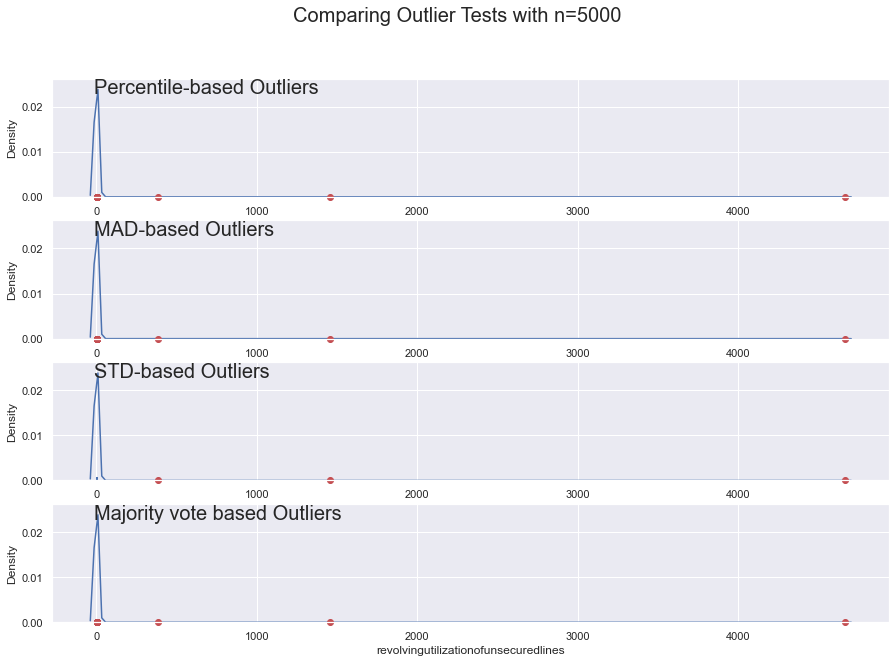

In [134]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

In [135]:
#revolvingutilizationofunsecuredlines 결측값 대체
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

<AxesSubplot:>

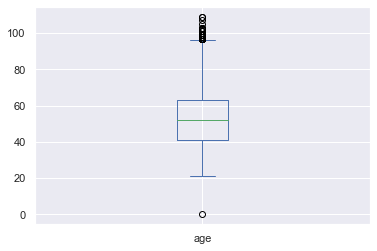

In [136]:
#age 열의 박스플롯 으로 확인
training_data.age.plot.box()

<class 'list'>


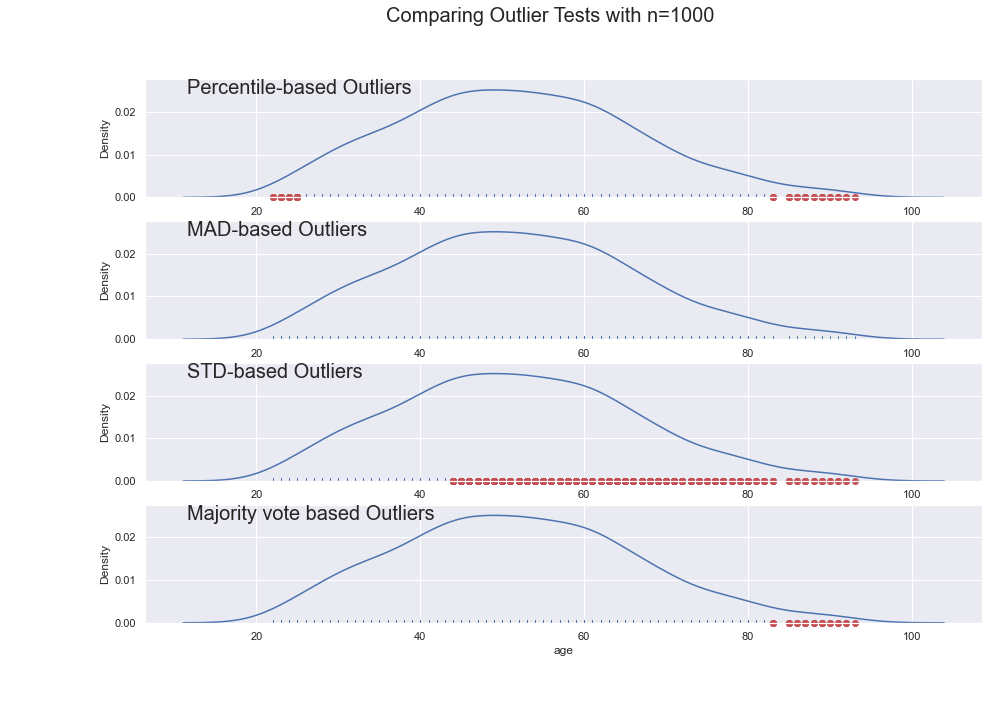

In [137]:
plotOutlier(training_data.age.sample(1000))

In [138]:
#나이에 대한 도수분포표 확인
print(training_data.age.value_counts().sort_index())

0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64


In [139]:
ageNew = []
for val in training_data.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
training_data.age = ageNew
print(training_data.age.value_counts().sort_index())

21     184
22     434
23     641
24     816
25     953
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 85, dtype: int64


<class 'list'>


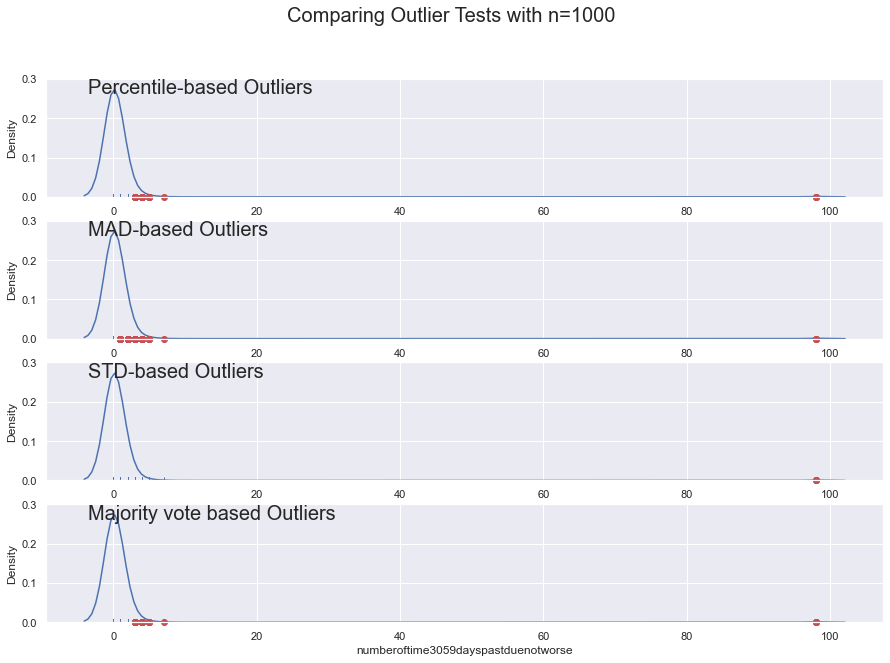

In [140]:
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))

In [141]:
#numberoftime3059dayspastduenotworse에 대한 도수분포표 확인
print(training_data.numberoftime3059dayspastduenotworse.value_counts().sort_index())

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: numberoftime3059dayspastduenotworse, dtype: int64


In [142]:
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

training_data.numberoftime3059dayspastduenotworse = New

<class 'list'>


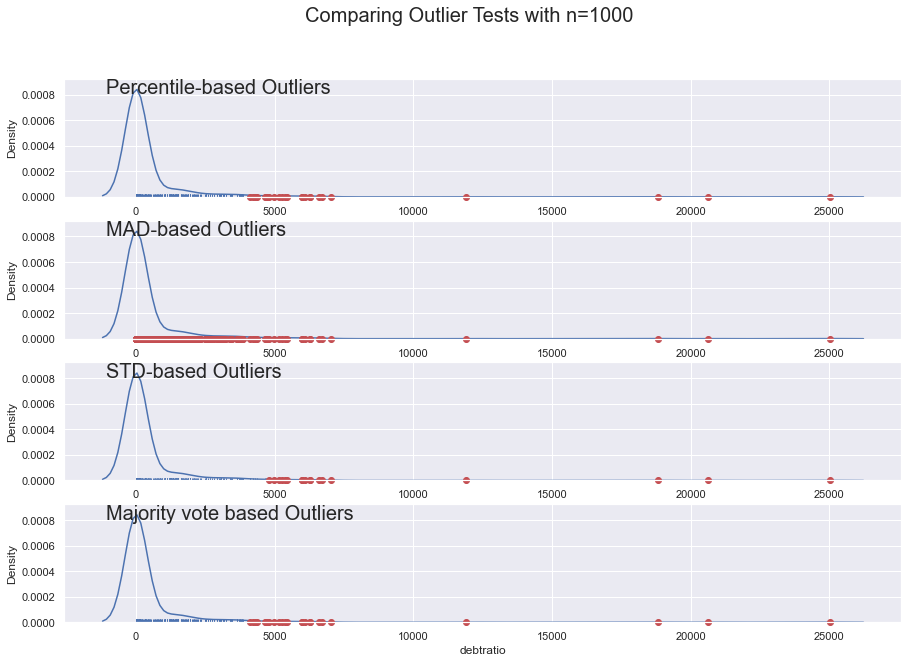

In [143]:
plotOutlier(training_data.debtratio.sample(1000))

In [144]:
#각 방법의 이상치 개수 확인하기 위한 함수
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict

outlierRatio(training_data.debtratio)

<class 'list'>


{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

In [145]:
#최소상계 값 구하기
minUpperBound = min([val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)) if out == True])

#최소상계 값으로 치환
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio 


<class 'list'>


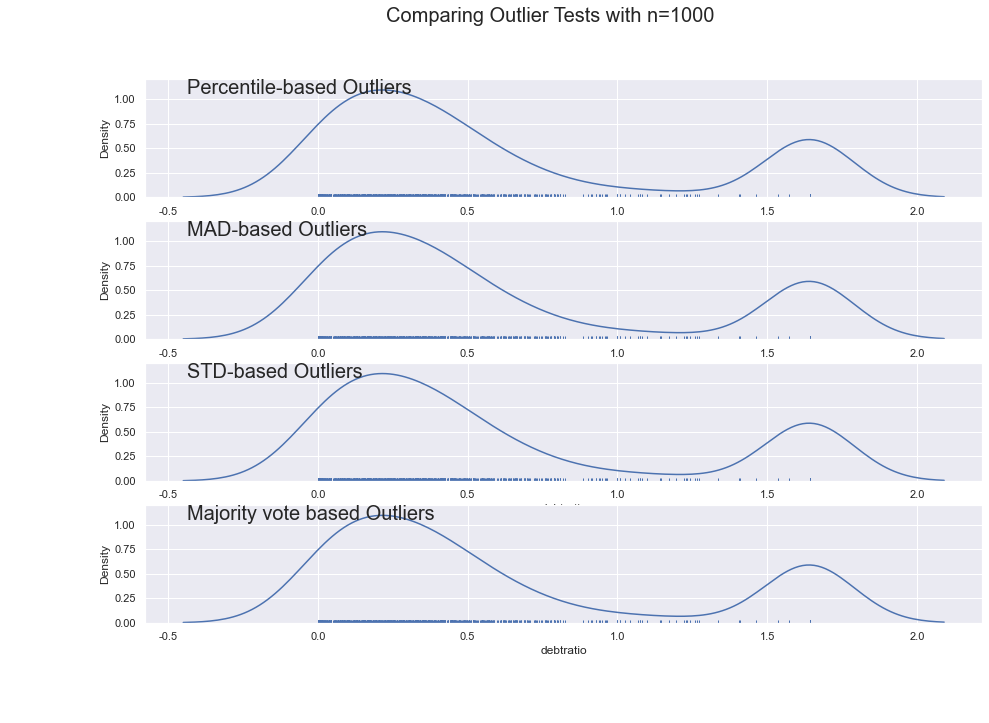

In [146]:
plotOutlier(training_data.debtratio.sample(1000))

<class 'list'>


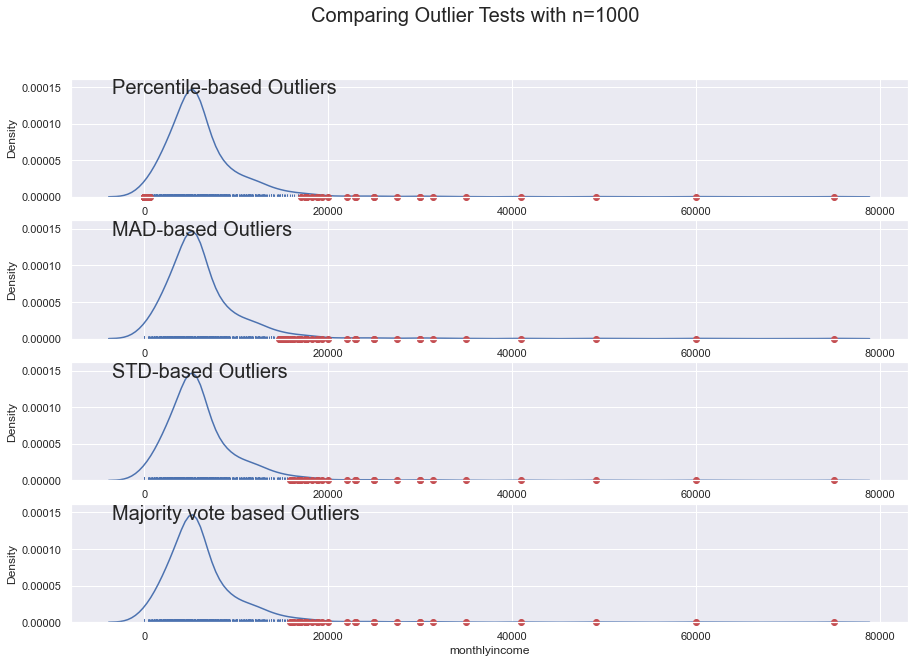

In [147]:
plotOutlier(training_data.monthlyincome.sample(1000))

In [148]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

training_data.monthlyincome = incomeNew


print(training_data.monthlyincome.value_counts().sort_index())

<class 'list'>
0.0        1634
1.0         605
2.0           6
4.0           2
5.0           2
           ... 
16850.0       3
16862.0       1
16864.0       1
16866.0       4
16867.0    3747
Name: monthlyincome, Length: 12189, dtype: int64


<class 'list'>


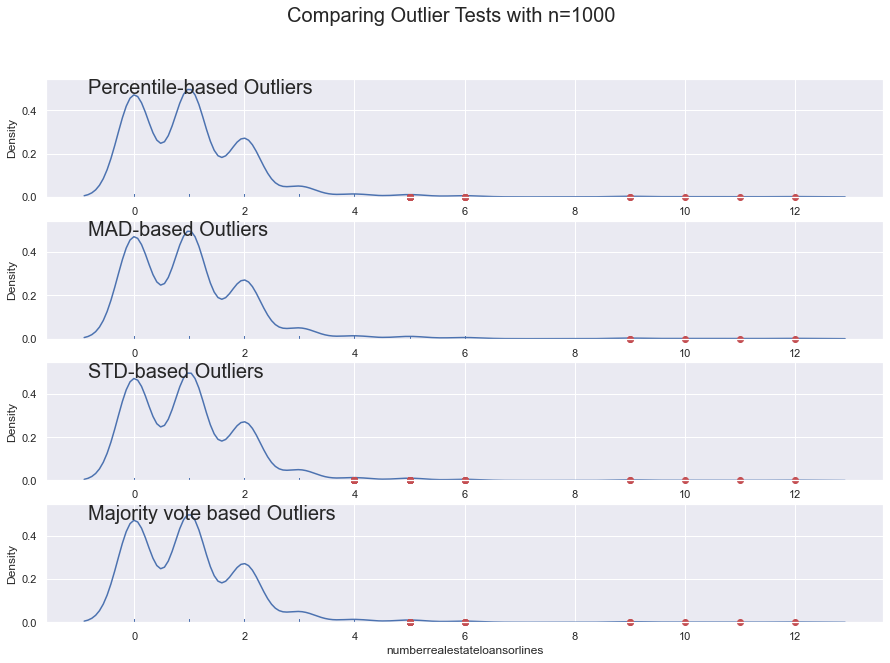

In [149]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

<class 'list'>


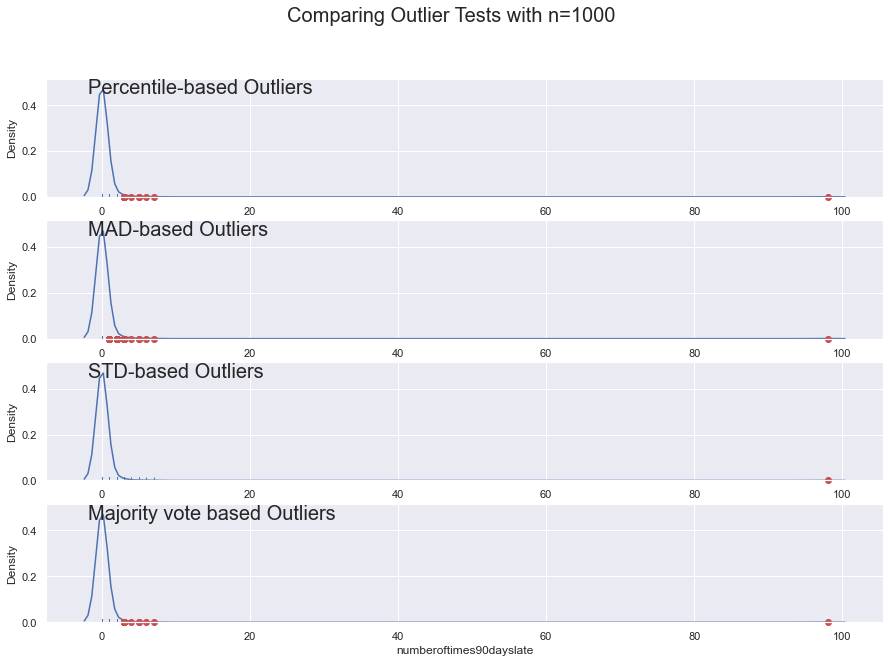

In [150]:
plotOutlier(training_data.numberoftimes90dayslate.sample(1000))

In [151]:
print(training_data.numberoftimes90dayslate.value_counts().sort_index())

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: numberoftimes90dayslate, dtype: int64


In [152]:
#중위수 대체
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)
training_data.numberoftimes90dayslate = new
print(training_data.numberoftimes90dayslate.value_counts().sort_index())

0.0     141931
1.0       5243
2.0       1555
3.0        667
4.0        291
5.0        131
6.0         80
7.0         38
8.0         21
9.0         19
10.0         8
11.0         5
12.0         2
13.0         4
14.0         2
15.0         2
17.0         1
Name: numberoftimes90dayslate, dtype: int64


In [153]:
print(training_data.numberrealestateloansorlines.value_counts().sort_index())

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: numberrealestateloansorlines, dtype: int64


In [154]:
realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [155]:
print(training_data.numberrealestateloansorlines.value_counts().sort_index())

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17       20
Name: numberrealestateloansorlines, dtype: int64


In [156]:
print(training_data.numberoftime6089dayspastduenotworse.value_counts().sort_index())

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: numberoftime6089dayspastduenotworse, dtype: int64


In [157]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new
print(training_data.numberoftime6089dayspastduenotworse.value_counts().sort_index())

0.0     142665
1.0       5731
2.0       1118
3.0        318
4.0        105
5.0         34
6.0         16
7.0          9
8.0          2
9.0          1
11.0         1
Name: numberoftime6089dayspastduenotworse, dtype: int64


In [158]:
print(training_data.numberofdependents.value_counts().sort_index())

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: numberofdependents, dtype: int64


In [159]:
depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)
training_data.numberofdependents = depNew
print(training_data.numberofdependents.value_counts().sort_index())

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        7
Name: numberofdependents, dtype: int64


## 랜덤 포리스트를 이용한 특성 중요도 파악

In [160]:
from sklearn.ensemble import RandomForestClassifier

#일반 특성 과 타겟 레이블 분리
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

features_label = training_data.columns[1:]

#랜덤 포리스트 분류기 생성 및 훈련
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)

#특성 중요도 저장
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.189053
 2) age                            0.154817
 3) numberoftime3059dayspastduenotworse 0.150809
 4) debtratio                      0.141929
 5) monthlyincome                  0.098143
 6) numberofopencreditlinesandloans 0.088968
 7) numberoftimes90dayslate        0.050406
 8) numberrealestateloansorlines   0.044934
 9) numberoftime6089dayspastduenotworse 0.044333
10) numberofdependents             0.036607


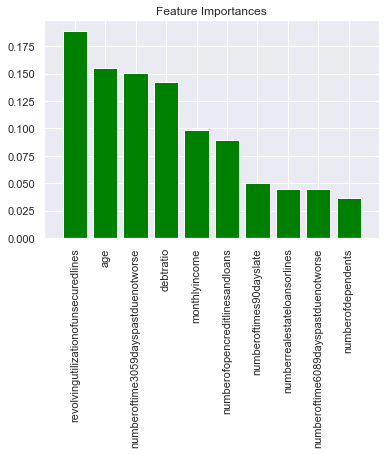

In [161]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 분류 알고리즘 수행

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### KNN 알고리즘

In [163]:
#KNN 훈련
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
knMod.fit(X_train, y_train)

knMod.score(X_test, y_test)

0.93248

In [164]:
#KNN 예측 과 평가
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5927662342530494

### 로직스틱 회귀

In [165]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
glmMod.fit(X_train, y_train)
glmMod.score(X_test, y_test)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 2
iter   5  #CD cycles 1
iter   6  #CD cycles 1
iter   7  #CD cycles 8
iter   8  #CD cycles 1
iter   9  #CD cycles 13
iter  10  #CD cycles 5
iter  11  #CD cycles 1
iter  12  #CD cycles 2
iter  13  #CD cycles 22
iter  14  #CD cycles 2
iter  15  #CD cycles 24
iter  16  #CD cycles 3
iter  17  #CD cycles 2
iter  18  #CD cycles 2
iter  19  #CD cycles 5
iter  20  #CD cycles 2
iter  21  #CD cycles 1
iter  22  #CD cycles 10
iter  23  #CD cycles 2
iter  24  #CD cycles 2
optimization finished, #iter = 24
Objective value = 21132.176584
#nonzeros/#features = 11/11


0.9374933333333333

In [166]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8481276317936285

### AdaBoost

In [167]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)
adaMod.fit(X_train, y_train)
adaMod.score(X_test, y_test)

0.9354666666666667

In [168]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8552784437990768

### GrandiantBoosting

In [169]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
gbMod.fit(X_train, y_train)
gbMod.score(X_test, y_test)

0.93704

In [170]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8611460045073426

### RandomForest

In [171]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)
rfMod.fit(X_train, y_train)
rfMod.score(X_test, y_test)

0.9325066666666667

In [172]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7659428828810254

### XGBoost

In [173]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

pred_probs = xgb_model.predict(dtest)

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    # ROC-AUC print 추가
    print('정확도: {0:.4f} ROC_AUC:{1:.4f}'.format(accuracy, roc_auc))
    
get_clf_eval(y_test , preds, pred_probs)

[0]	train-logloss:0.61794	eval-logloss:0.61777
[1]	train-logloss:0.55626	eval-logloss:0.55608
[2]	train-logloss:0.50506	eval-logloss:0.50484
[3]	train-logloss:0.46199	eval-logloss:0.46165
[4]	train-logloss:0.42543	eval-logloss:0.42504
[5]	train-logloss:0.39425	eval-logloss:0.39374
[6]	train-logloss:0.36740	eval-logloss:0.36679
[7]	train-logloss:0.34421	eval-logloss:0.34359
[8]	train-logloss:0.32412	eval-logloss:0.32342
[9]	train-logloss:0.30660	eval-logloss:0.30591
[10]	train-logloss:0.29140	eval-logloss:0.29061
[11]	train-logloss:0.27808	eval-logloss:0.27728
[12]	train-logloss:0.26646	eval-logloss:0.26560
[13]	train-logloss:0.25626	eval-logloss:0.25539
[14]	train-logloss:0.24732	eval-logloss:0.24643
[15]	train-logloss:0.23947	eval-logloss:0.23855
[16]	train-logloss:0.23256	eval-logloss:0.23167
[17]	train-logloss:0.22653	eval-logloss:0.22557
[18]	train-logloss:0.22119	eval-logloss:0.22027
[19]	train-logloss:0.21651	eval-logloss:0.21557
[20]	train-logloss:0.21242	eval-logloss:0.21144
[2

[170]	train-logloss:0.17534	eval-logloss:0.17771
[171]	train-logloss:0.17533	eval-logloss:0.17772
[172]	train-logloss:0.17531	eval-logloss:0.17772
[173]	train-logloss:0.17529	eval-logloss:0.17771
[174]	train-logloss:0.17526	eval-logloss:0.17771
[175]	train-logloss:0.17525	eval-logloss:0.17771
[176]	train-logloss:0.17523	eval-logloss:0.17771
[177]	train-logloss:0.17521	eval-logloss:0.17771
[178]	train-logloss:0.17518	eval-logloss:0.17771
[179]	train-logloss:0.17518	eval-logloss:0.17771
[180]	train-logloss:0.17515	eval-logloss:0.17771
[181]	train-logloss:0.17513	eval-logloss:0.17770
[182]	train-logloss:0.17511	eval-logloss:0.17770
[183]	train-logloss:0.17510	eval-logloss:0.17770
[184]	train-logloss:0.17508	eval-logloss:0.17769
[185]	train-logloss:0.17506	eval-logloss:0.17769
[186]	train-logloss:0.17505	eval-logloss:0.17769
[187]	train-logloss:0.17504	eval-logloss:0.17770
[188]	train-logloss:0.17504	eval-logloss:0.17770
[189]	train-logloss:0.17503	eval-logloss:0.17771
[190]	train-logloss:

### LightGBM 수행

In [174]:
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

OSError: dlopen(/Users/adam/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/adam/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/oracle/instantclient_19_8/libomp.dylib' (no such file), '/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

## 교차 검증

In [ ]:
from xgboost import XGBClassifier
xgbMod = XGBClassifier()

from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized


cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod, xgbMod, lgbm_wrapper], scr='roc_auc')
print(cvD)

## 하이퍼 파라미터 조정

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### adaboost

In [ ]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)
gridSearchAda.best_params_, gridSearchAda.best_score_

### grandianboosting

In [ ]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_

### 조정된하이퍼 파라미터로 모델 훈련

In [ ]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')
cvDictbestpara

In [ ]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

## 특성 변환

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')
                                                
cvDictbestpara_transform

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

In [ ]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [ ]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

## 투표 기반 앙상블 모델

### 특성을 변환한 모델을 이용한 훈련

In [ ]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

votingMod.score(X_test_transform, y_test)

In [ ]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

### 변환되기 이전의 특성을 이용한 훈련

In [ ]:
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

## 테스트 데이터에서 머신러닝 모델 실행

In [ ]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('./data/cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})
output.to_csv("./predictions.csv", index=False)

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)